In [5]:
#1. PACKAGES AND FILE LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import chisquare
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

file_path = "https://raw.githubusercontent.com/Komiagbolahun/Supplementary-Files-For-Manuscript---Why-Do-Methane-Emissions-Occur-.../main/Adekomi%20et%20al%20Excel%20worksheet.xlsx"
df = pd.read_excel(file_path, sheet_name="1. Anonymized Causal Analysis S")
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [7]:
df.columns

Index(['Equipment Type', 'First Scan Date Time (UTC)',
       'Last Scan Date Time (UTC)', 'Number Of Scans', 'Persistence',
       'Avg Emission Rate (kg/h)', 'Avg Plume Height (ft)', 'Route Name',
       'Emission Investigated', 'Investigation Criteria',
       'Emission on Own Property',
       'Time/Date of emission verification (m/d/yyyy; h:mm)',
       'Verification Method', 'Associated Equipment',
       'Compressor State - Initial flight', 'Compressor State - Reflight',
       'Tank Type', 'Tank Configuration', 'Type of Emission', 'Cause',
       'Repair/Resolution Date (m/d/yyyy; h:mm)',
       'If pending, estimated time for resolution', 'Other Commment',
       'Associated Component', 'Emission included in inventory?',
       'Associated rate in inventory? Kg/h', 'Frequecy of Emission',
       'Emission duration', 'Independent rate estimate',
       'Any reason to question Bridger location or rate?',
       'Tfirstscan/\nTobserved', 'Tlast scan', 'Trepair',
       'Duration/

Note: In this code, the emission causal/causal categories used in the manuscript are referred to as 'Emission Type'. Other terms, such as 'broad causes', 'reported cause', and 'true cause', correspond to different stages of the raw classification process from operators. These terms are only used in preprocessing and are not directly referenced in the manuscript analysis, except in the fault tree portion. No prior knowledge of this processing or these terms is required to use the code or to understand the manuscript's analysis.

In [ ]:
            #2.1 QUALITY CHECK FOR COLUMN LIST (NOT REQUIRED)
newcolumn_name = 'Emission Type'  #'Emission Type' is the category of the cause reported by the company

# All uniques
unique_values = df[newcolumn_name].unique()
print(f'Unique values in {newcolumn_name} are: \n{unique_values}')

# Number of uniques
total_unique = df[newcolumn_name].nunique()
print(f"\nTotal number of unique values in '{newcolumn_name}': {total_unique}")

# Count of each unique
unique_counts = df[newcolumn_name].value_counts()
print(f"\nCount of each unique value in '{newcolumn_name}':\n", unique_counts)

# Count the number of rows left for each company
company_counts = df['COMPANY'].value_counts()
company_counts

In [34]:
     #2.2 MORE QUALITY CHECK (NOT REQUIRED)

category_to_check = 'Incorrect Valve Position'   #Assign the category you want to check
subset_df = df[df['Emission Type'] == category_to_check]
column_name = 'True Cause'  # Now the stats on subset_df can be checked

unique_values = subset_df[column_name].unique()
print(f"Unique values in '{column_name}' for '{category_to_check}':\n{unique_values}")
total_unique = subset_df[column_name].nunique()
print(f"\nTotal number of unique values: {total_unique}")
unique_counts = subset_df[column_name].value_counts()
print(f"\nCounts of each unique value:\n{unique_counts}")

Unique values in 'True Cause' for 'Incorrect Valve Position':
['Incorrect Valve Position' 'Dump Valve Cut/Open' 'Stuck dump valve']

Total number of unique values: 3

Counts of each unique value:
True Cause
Dump Valve Cut/Open         92
Incorrect Valve Position    29
Stuck dump valve            17
Name: count, dtype: int64



Total number of unique values in 'True Cause': 63

Count of each unique value in 'True Cause':
 True Cause
Thief Hatch / Tank Opening    305
Compressor Rod Packing        207
Third party                   135
Combustion slip               125
Dump Valve Cut/Open            92
                             ... 
Well Shutdown                   1
Gas Buster                      1
GPU box                         1
Fracking                        1
Wellhead vents                  1
Name: count, Length: 63, dtype: int64


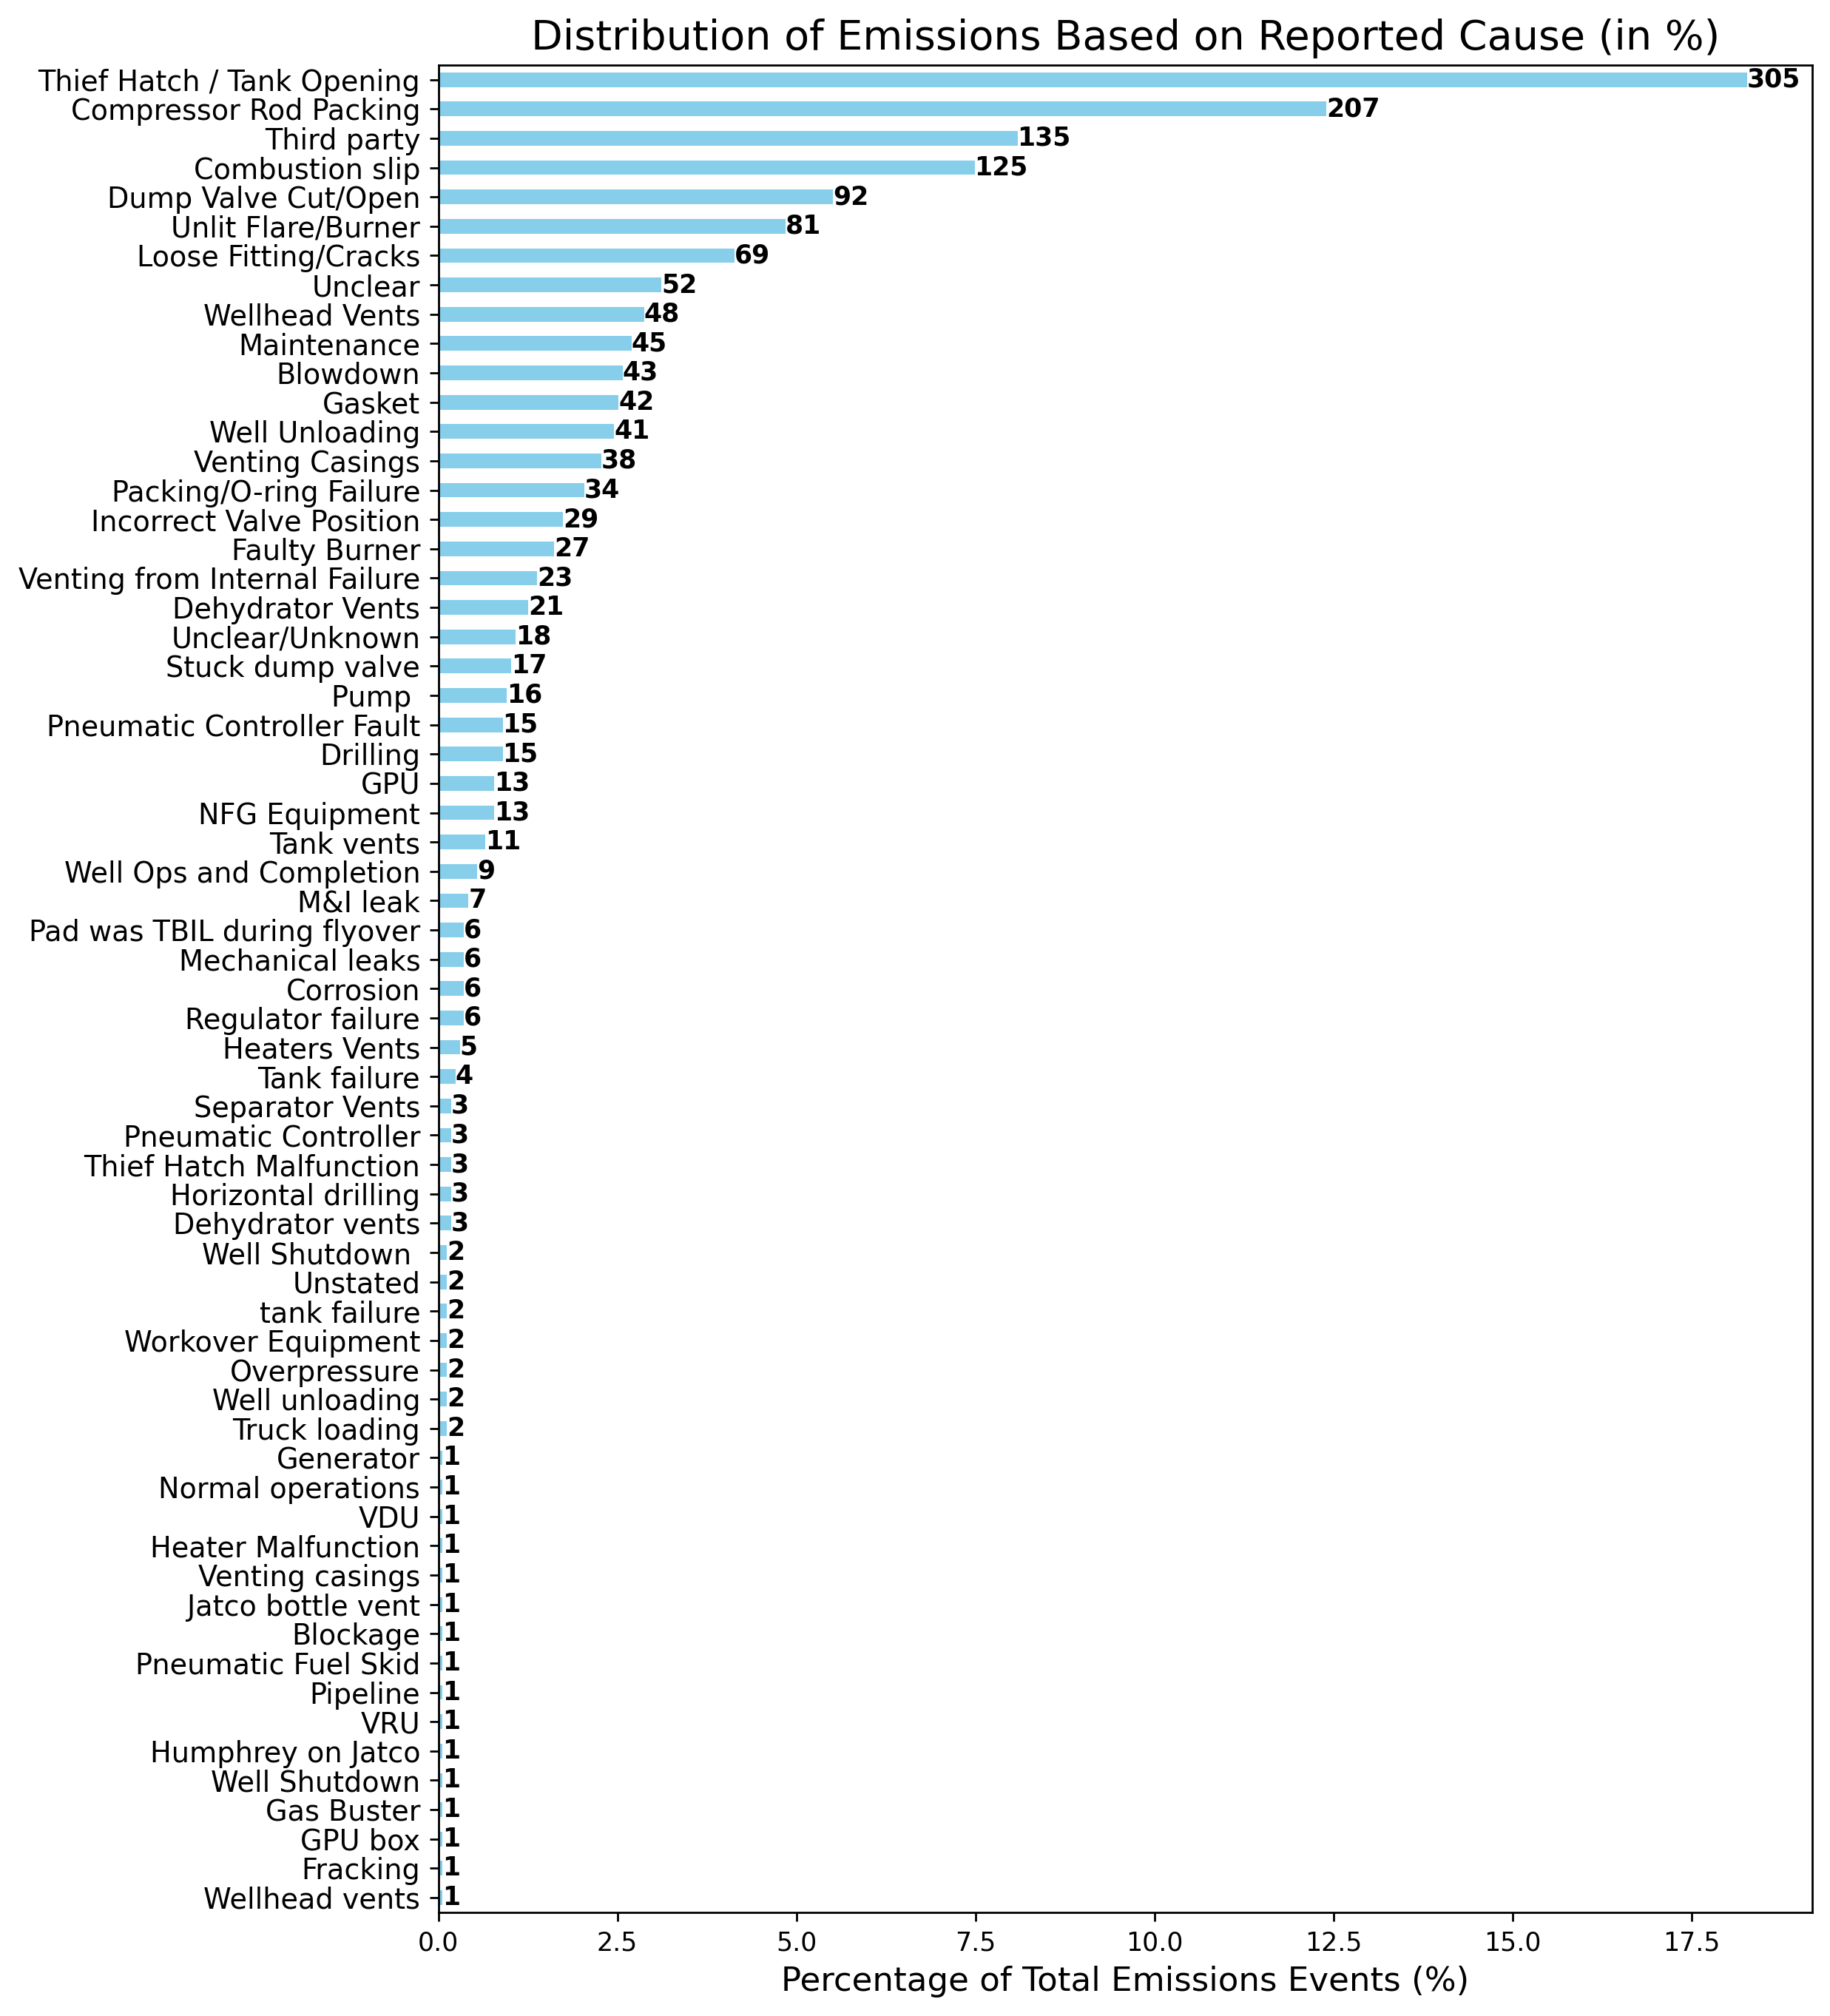

In [36]:
     #3.1 - SI FIGURE S1 - Distribution of 1,669 operator-reported (True Cause) emission events across 61 unique.

column_name = 'True Cause' #'True Cause' os the emission cause reported by the company

# All uniques
unique_values = df[column_name].unique()
#print(f'Unique values in {column_name} are: \n{unique_values}')

# Number of uniques
total_unique = df[column_name].nunique()
print(f"\nTotal number of unique values in '{column_name}': {total_unique}")

# Count of each unique
unique_counts = df[column_name].value_counts()
print(f"\nCount of each unique value in '{column_name}':\n", unique_counts)

# Calculate the distribution
cause_distribution = df['True Cause'].value_counts()
total_count = len(df['True Cause'].dropna())
percentage_distribution = (cause_distribution / total_count) * 100

# Create horizontal bar chart
plt.figure(figsize=(10, 11), dpi=250)  # Increased height for better readability
bars = percentage_distribution.plot(kind='barh', color='skyblue')

for index, value in enumerate(percentage_distribution):      # Add percentage labels on the bars
   plt.text(value, index, f'{cause_distribution.iloc[index]}', va='center', fontweight='bold')

plt.title('Distribution of Emissions Based on Reported Cause (in %)', fontsize=16)  
plt.xlabel('Percentage of Total Emissions Events (%)', fontsize=13)
plt.ylabel('', fontsize=12)
plt.yticks(fontsize=11)  # Improve readability of y-axis labels
plt.gca().invert_yaxis()  # Invert y-axis so largest bars appear at the top
plt.tight_layout()
#plt.savefig('cnxrough1.png', format='png', dpi=300)  # Save the plot
plt.show()

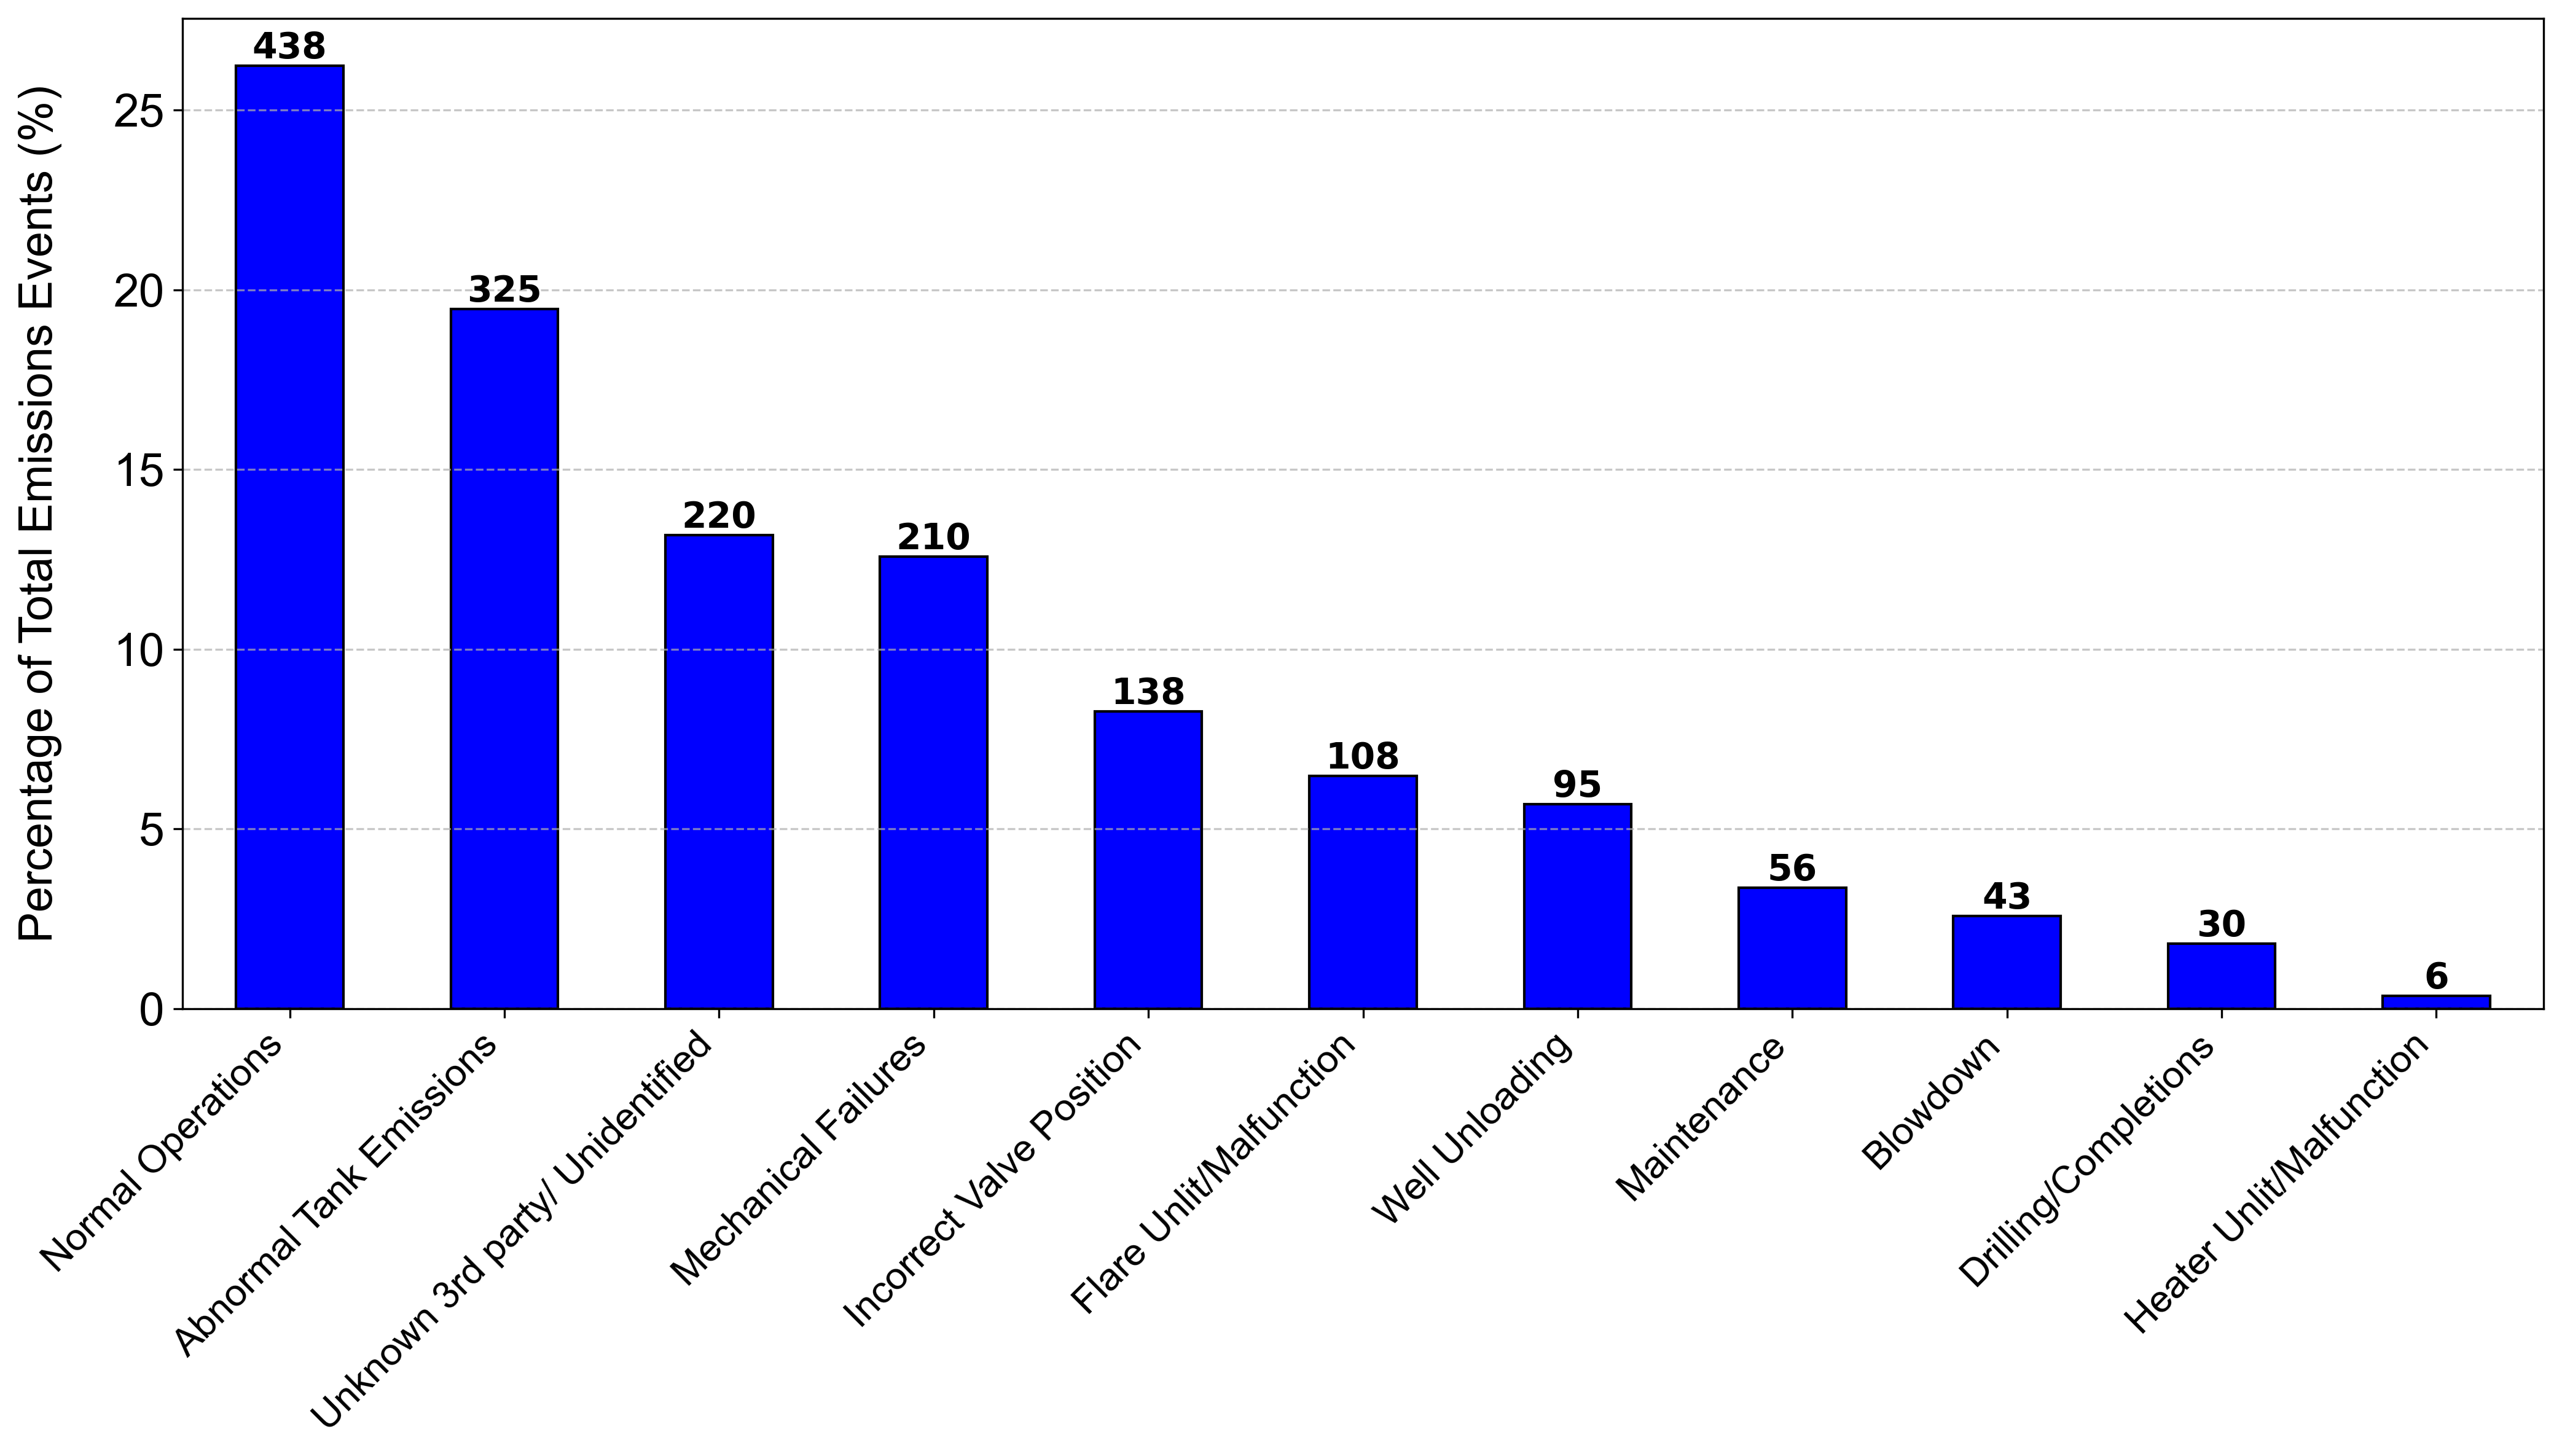

In [38]:
        #3.2 SI Figure S2 - Distribution of Operator emission events across 11 harmonized emission types. 
column_name = 'Emission Type'

cause_distribution = df['Emission Type'].value_counts()
total_count = len(df['Emission Type'].dropna())
percentage_distribution = (cause_distribution / total_count) * 100

plt.figure(figsize=(14, 8), dpi=300)
bars = percentage_distribution.plot(kind='bar', color='blue', edgecolor='black')

# Add percentage labels on each bar 
for index, value in enumerate(percentage_distribution):
    plt.text(index, value, f'{cause_distribution.iloc[index]}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('', fontsize=18, fontweight='bold', fontname="Arial") #Distribution of Emissions Events Based on Emission Type
plt.xlabel('', fontsize=18, fontname="Arial", labelpad=5) #Emission Type
plt.ylabel('Percentage of Total Emissions Events (%)', fontsize=18, fontname="Arial", labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=15, fontname="Arial")
plt.yticks(fontsize=18, fontname="Arial")
plt.grid(axis='y', linestyle='--', alpha=0.7) #add grid
plt.tight_layout()
#plt.savefig('emission_countdistribution_withNO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

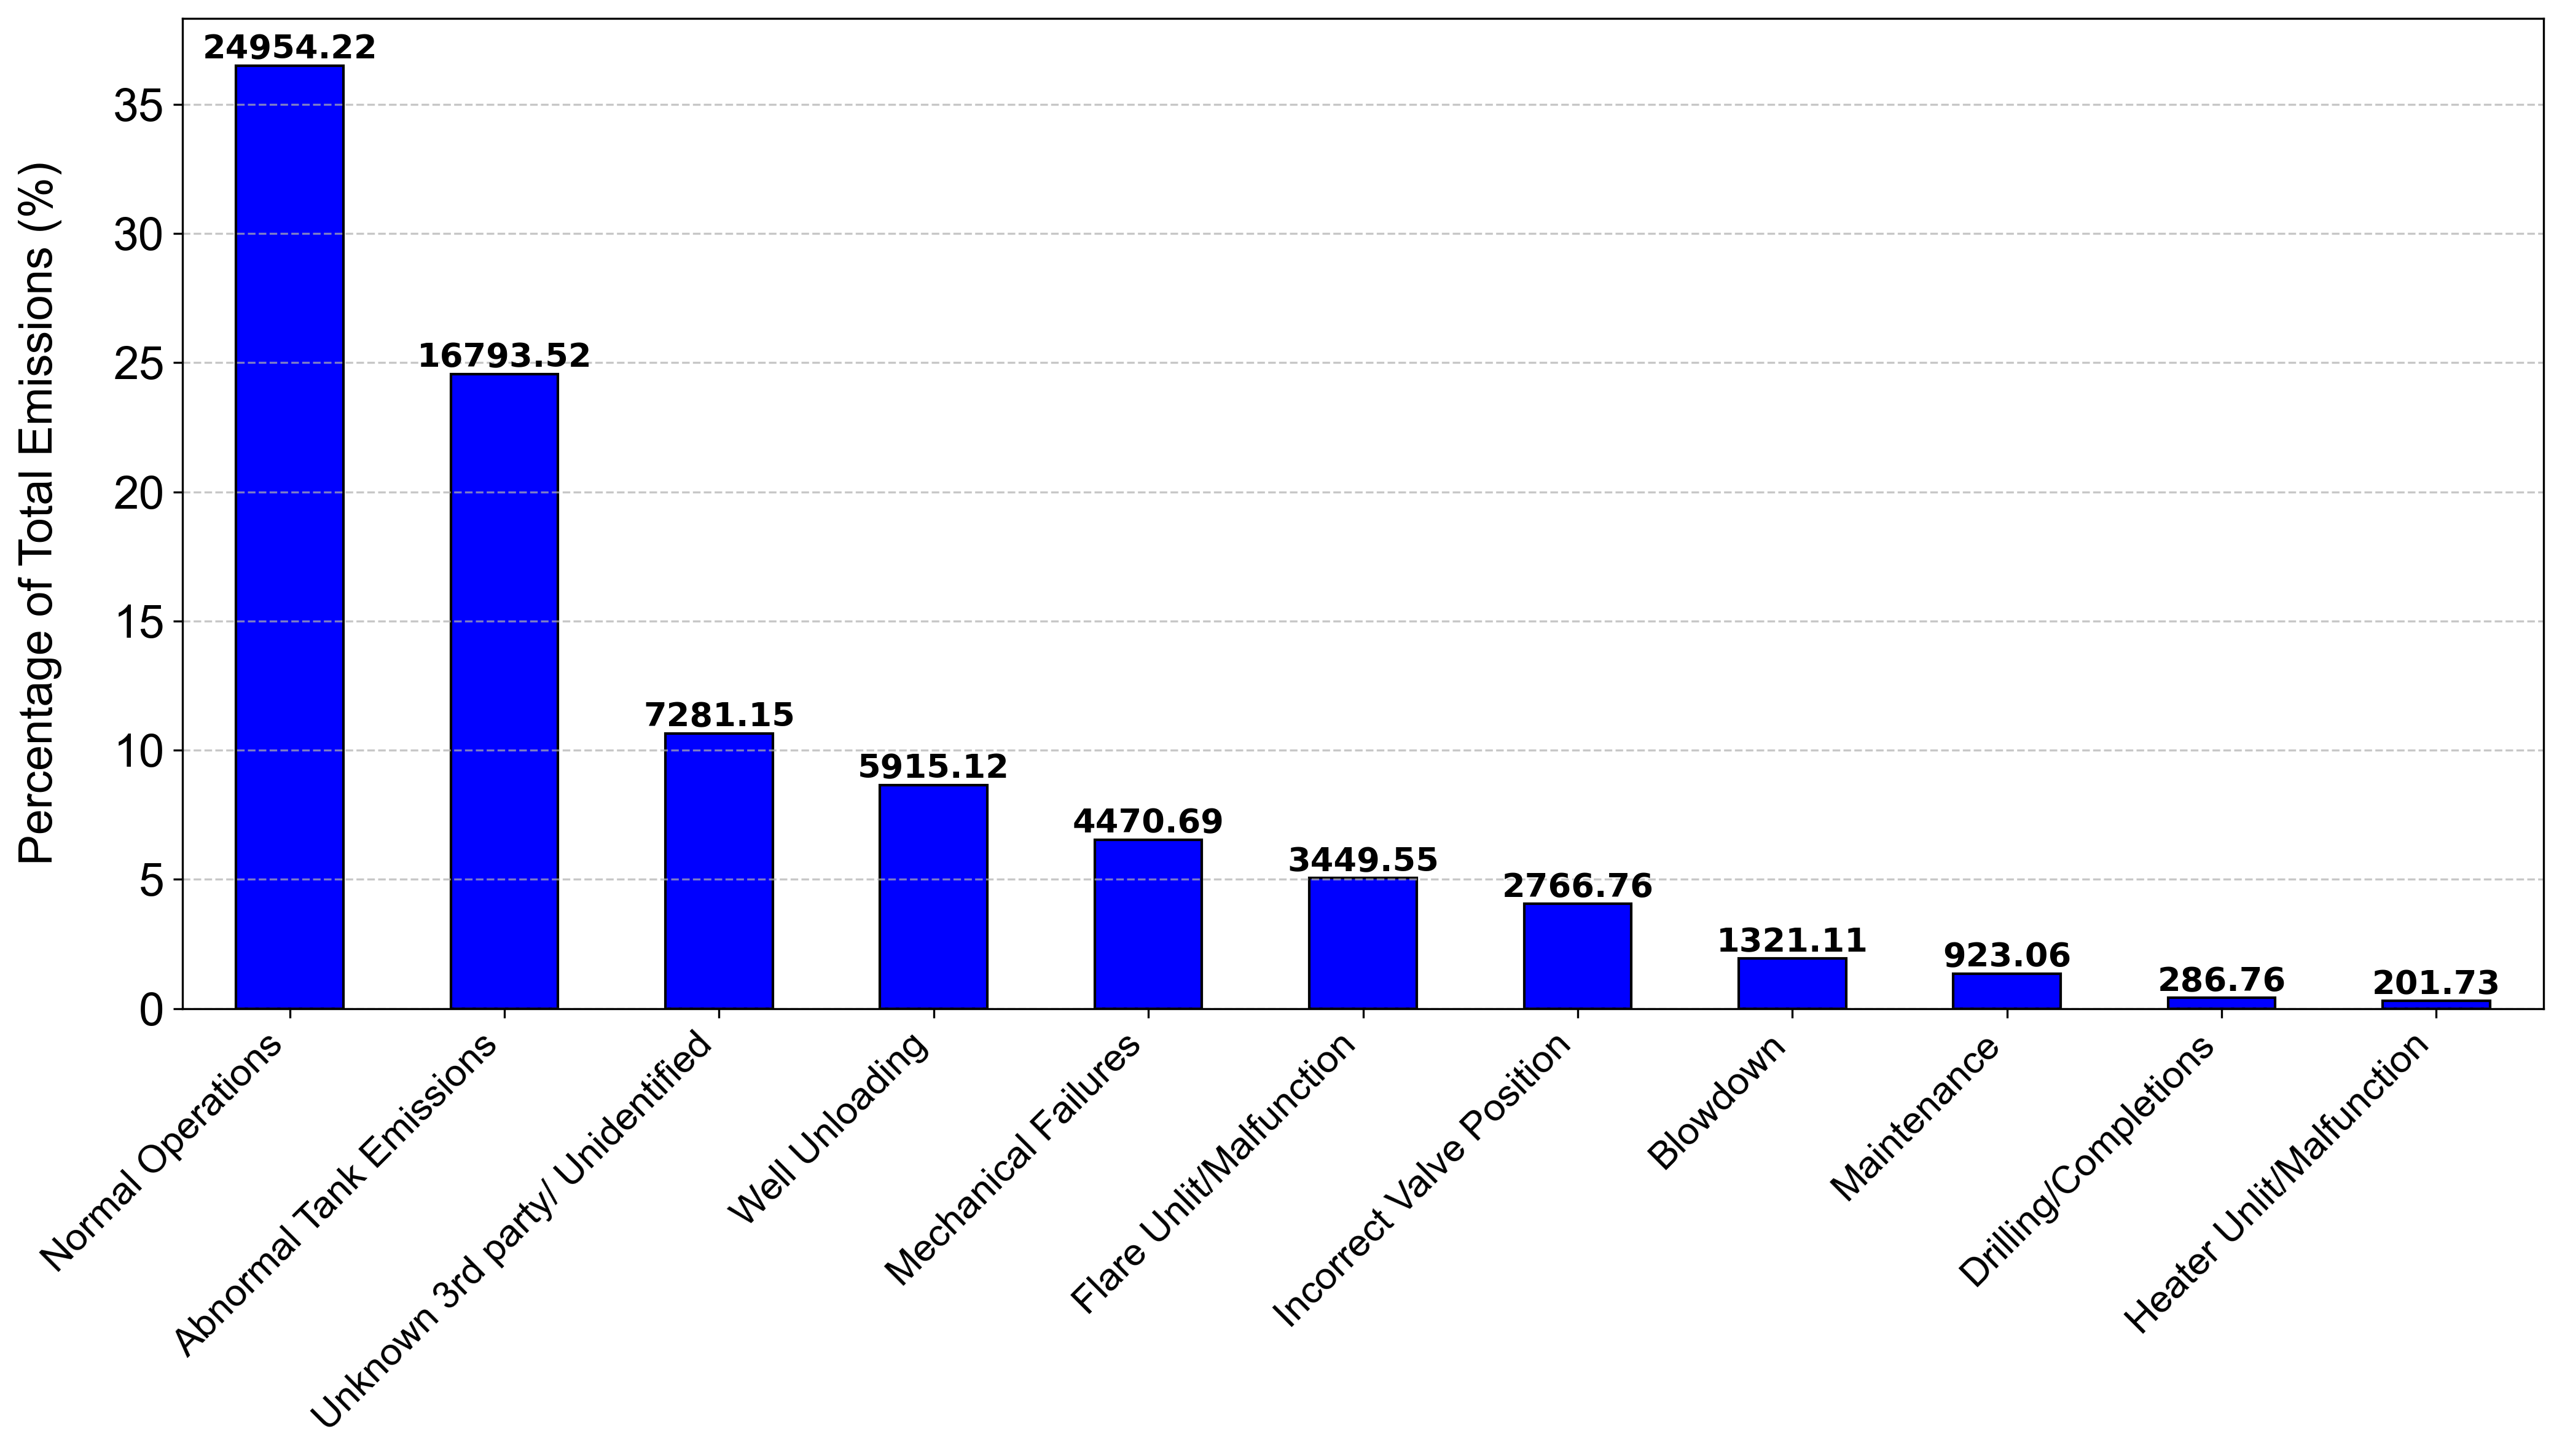

In [40]:
            #3.2b - Distribution of Operator emission rates across 11 harmonized emission types. 

cause_distribution = df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum() # Total emissions for each Emission Type

# Calculate percentage distribution for the y-axis
total_emission = cause_distribution.sum()
percentage_distribution = (cause_distribution / total_emission) * 100  # Normalize to percentage

# Sort values in descending order
percentage_distribution = percentage_distribution.sort_values(ascending=False)
cause_distribution = cause_distribution.loc[percentage_distribution.index]  # Align absolute values with sorted percentages

plt.figure(figsize=(14, 8), dpi=300)
bars = percentage_distribution.plot(kind='bar', color='blue', edgecolor='black')
# Add emission totals as labels on the bars
for index, value in enumerate(percentage_distribution):
    plt.text(index, value, f'{cause_distribution.iloc[index]:.2f}', ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title('', fontsize=18, fontweight='bold', fontname="Arial") #Total Emissions Rate by Emission Type (kg/hr)
plt.xlabel('', fontsize=18, fontname="Arial", labelpad=20)  # Emission Type
plt.ylabel('Percentage of Total Emissions (%)', fontsize=18, fontname="Arial", labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=15, fontname="Arial")
plt.yticks(fontsize=18, fontname="Arial")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('total_emissions_rate__withNO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

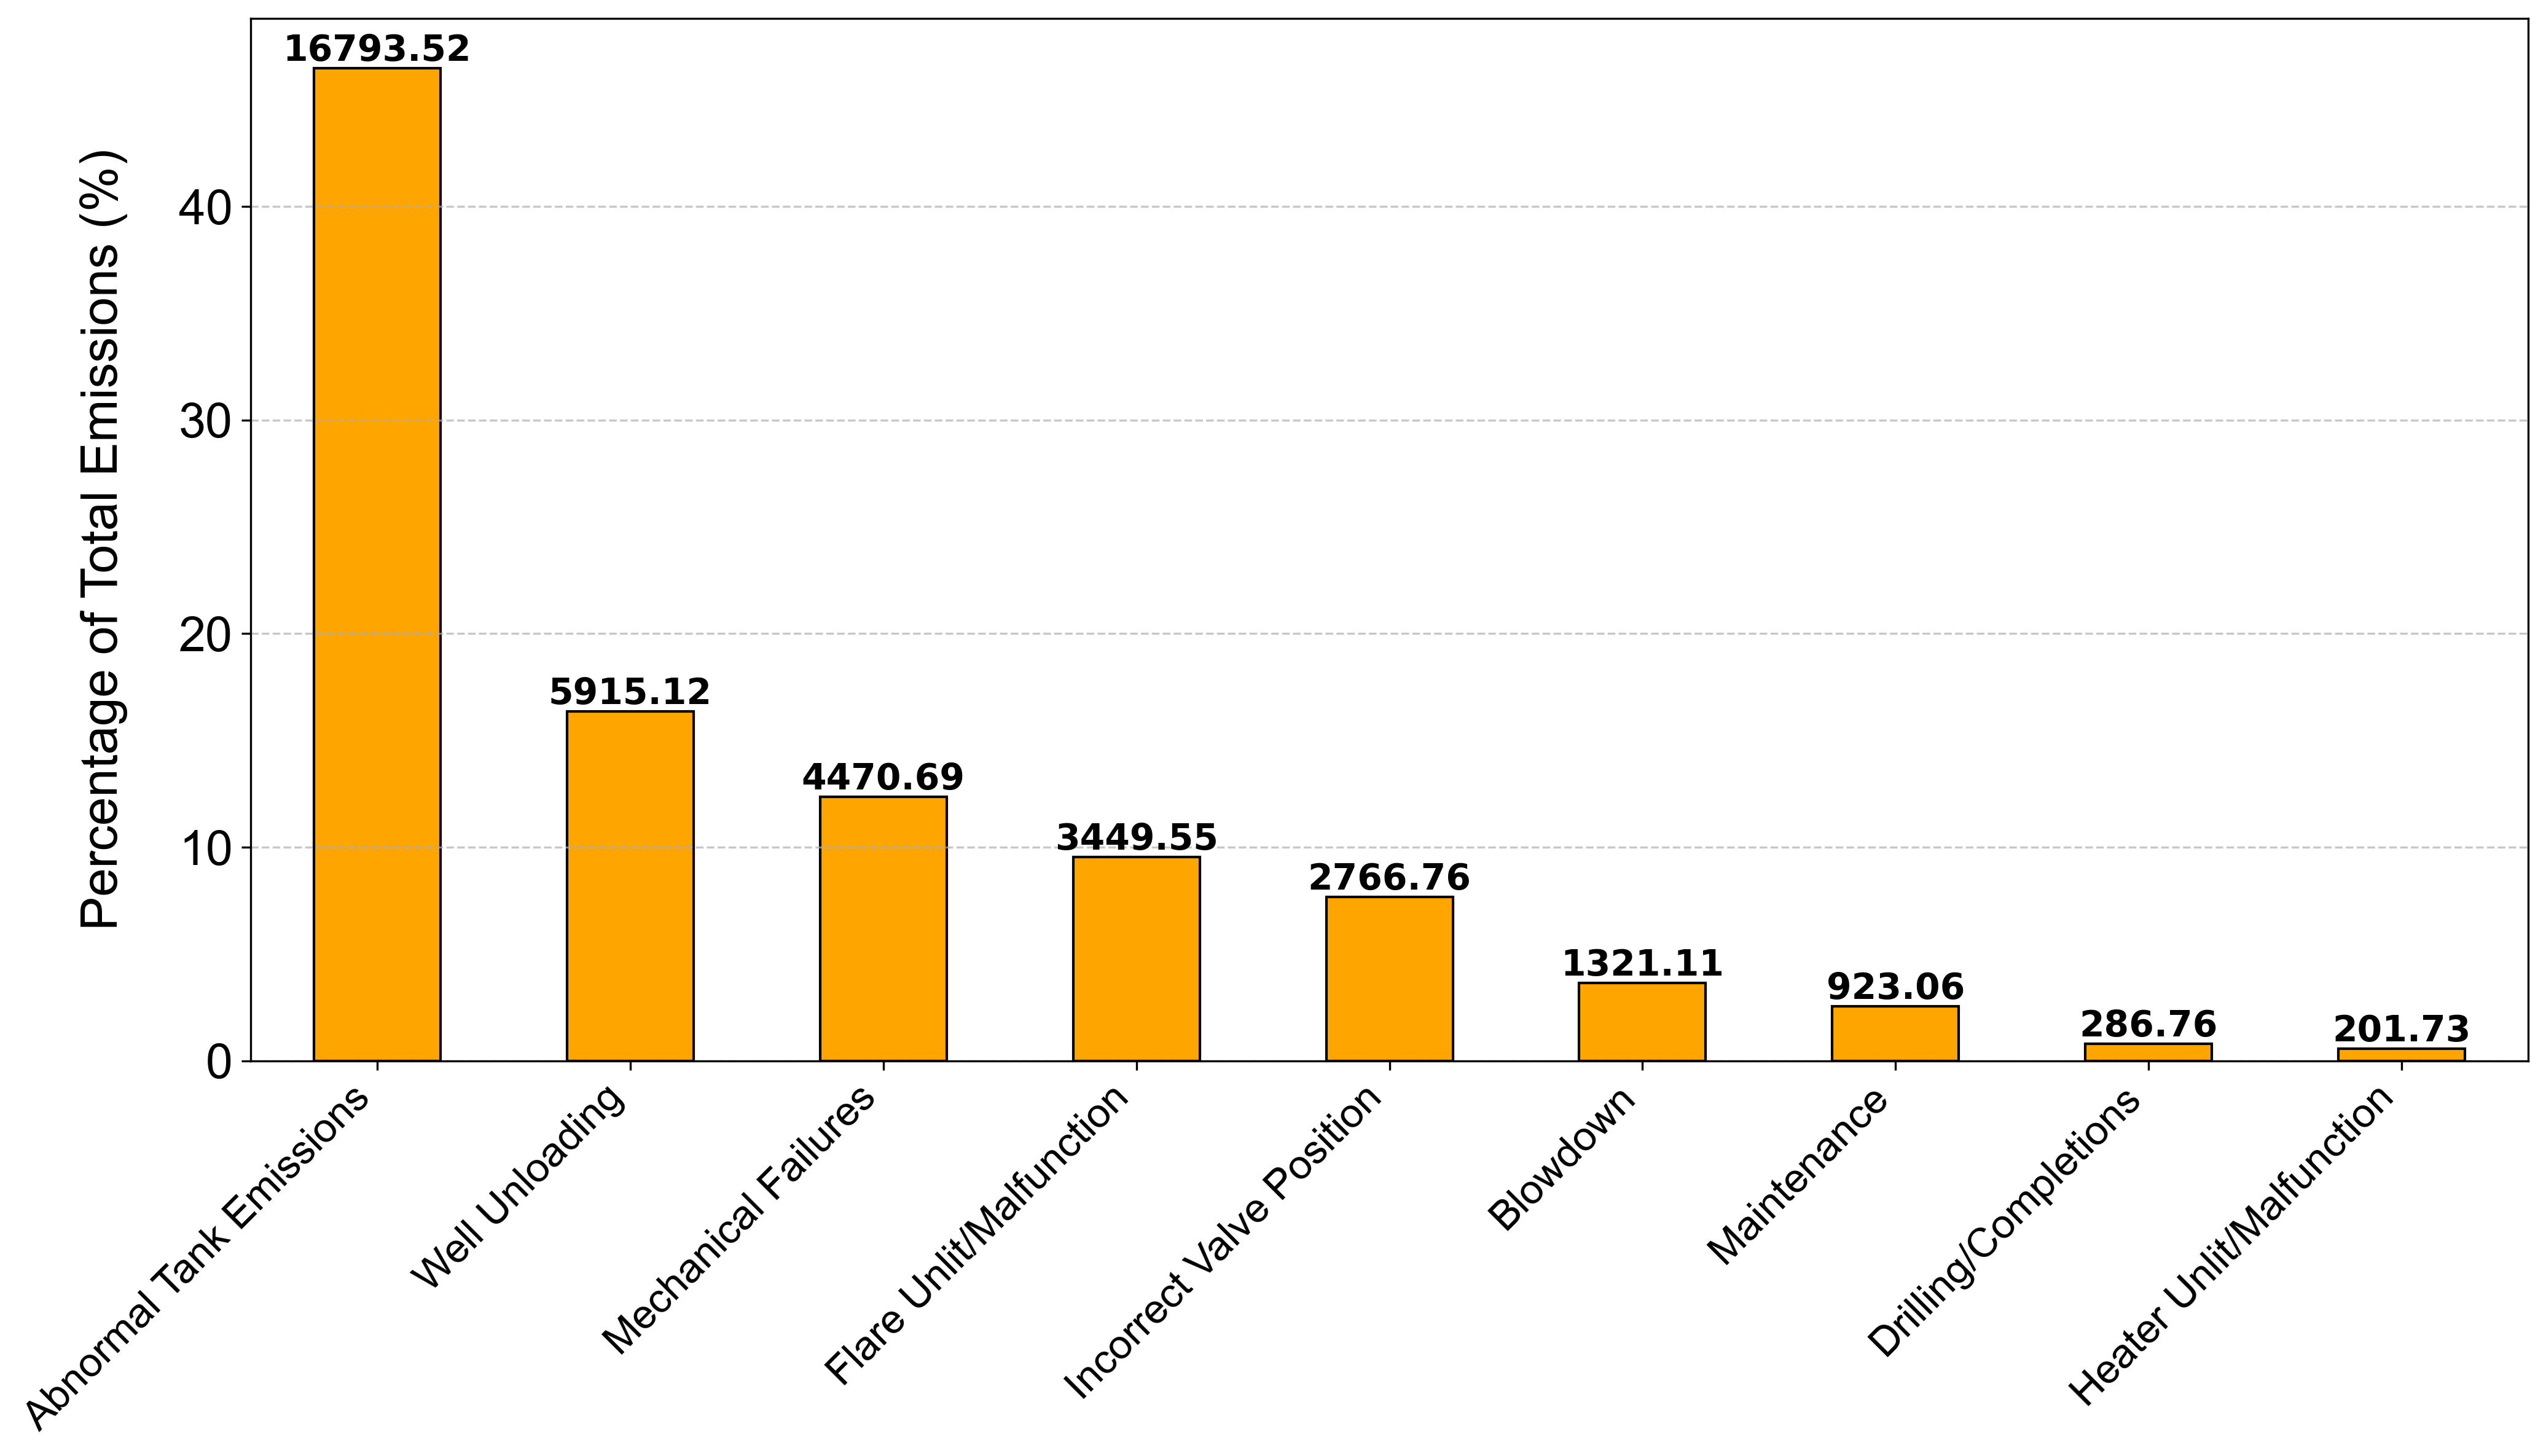

In [42]:
        #3.3a - SI Figure S4 - Distribution of emission rates across nine emission types after exclusions

excluded_categories = ["Others", "Unknown 3rd party/ Unidentified", "Normal Operations"]

filtered_df = df[~df['Emission Type'].isin(excluded_categories)]
filtered_cause_distribution = filtered_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum() # Total emissions for each Emission Type (filtered)
filtered_total_emission = filtered_cause_distribution.sum() # Calculate percentage distribution for the y-axis
filtered_percentage_distribution = (filtered_cause_distribution / filtered_total_emission) * 100

filtered_percentage_distribution = filtered_percentage_distribution.sort_values(ascending=False)
filtered_cause_distribution = filtered_cause_distribution.loc[filtered_percentage_distribution.index]  # Align absolute values with sorted percentages

# Plot
plt.figure(figsize=(14, 8), dpi=300)
bars = filtered_percentage_distribution.plot(kind='bar', color='orange', edgecolor='black')
for index, value in enumerate(filtered_percentage_distribution): # Add emission totals as labels on the bars
    plt.text(index, value, f'{filtered_cause_distribution.iloc[index]:.2f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('', fontsize=22, fontweight='bold', fontname="Arial") # Emission Rate Distribution (kg/hr)
plt.xlabel('', fontsize=20, fontname="Arial", labelpad=20)
plt.ylabel('Percentage of Total Emissions (%)', fontsize=20, fontname="Arial", labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=16, fontname="Arial")
plt.yticks(fontsize=19, fontname="Arial")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('emission_distribution_exNO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

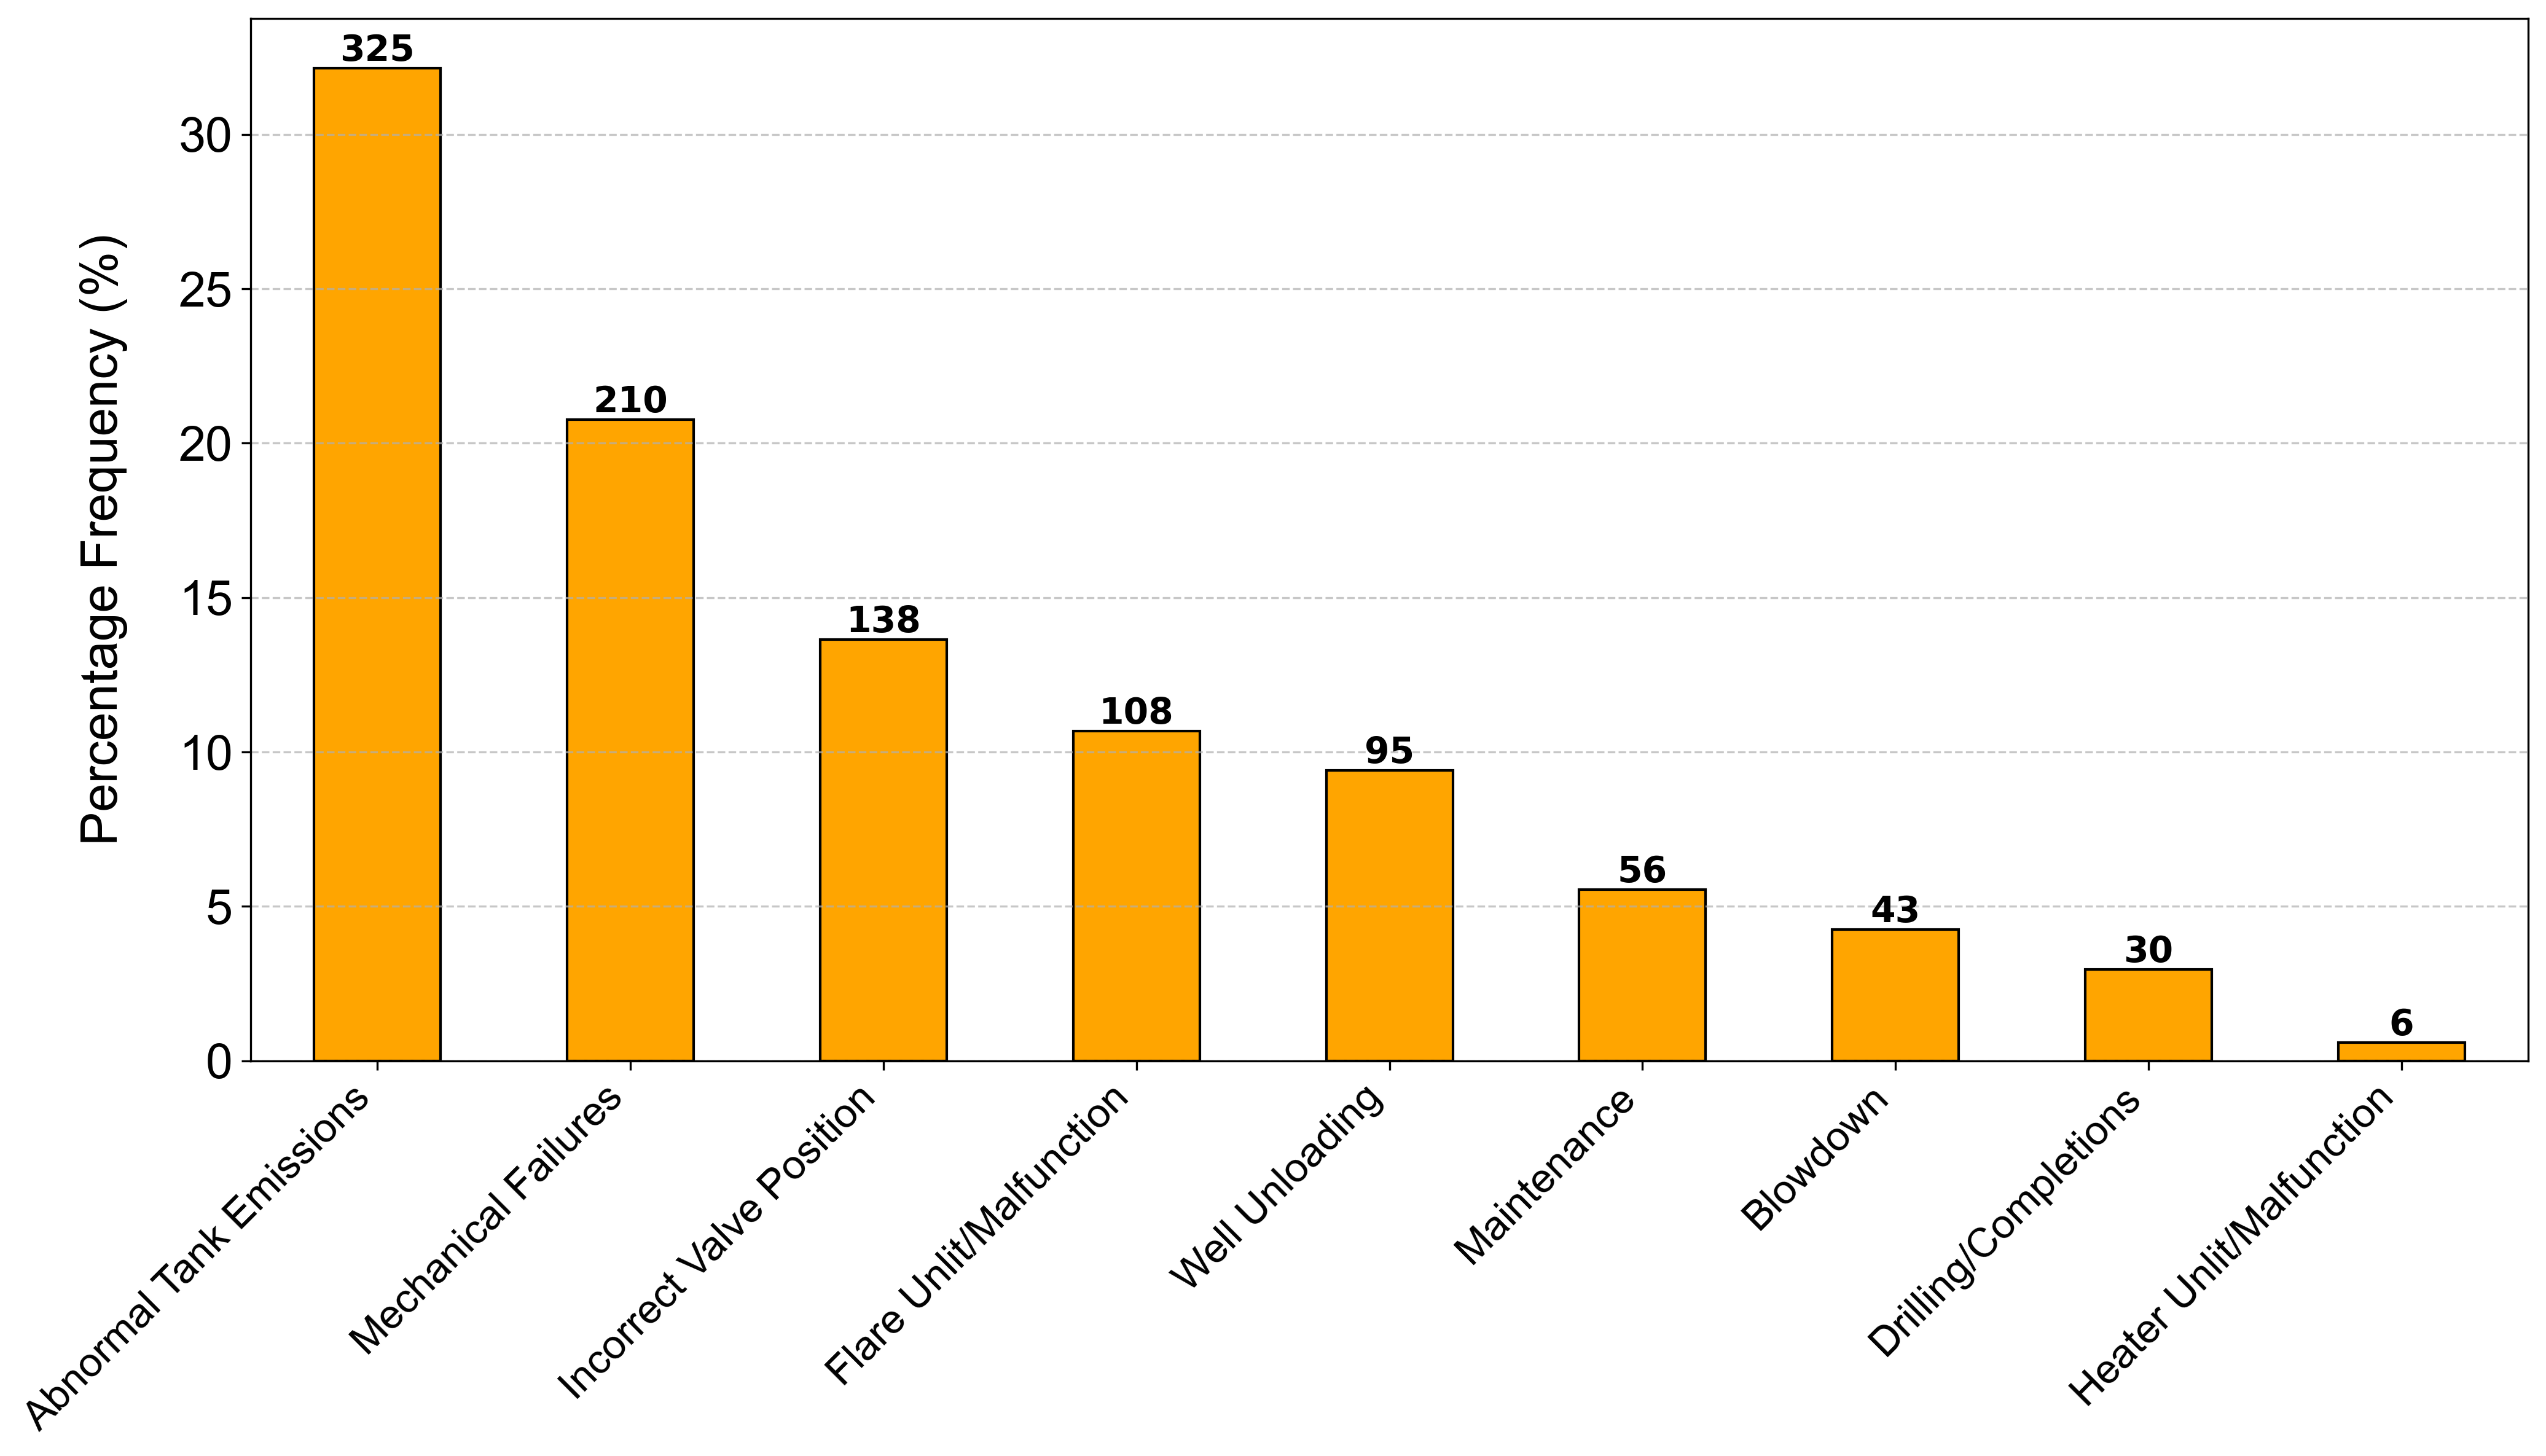

In [44]:
            #3.3b - SI Figure S3 Distribution of emission events across nine emission types after exclusions

excluded_categories = ["Others", "Unknown 3rd party/ Unidentified", "Normal Operations"]

filtered_cause_distribution = df[~df['Emission Type'].isin(excluded_categories)]['Emission Type'].value_counts()
filtered_total_count = len(df[~df['Emission Type'].isin(excluded_categories)]['Emission Type'].dropna())
filtered_percentage_distribution = (filtered_cause_distribution / filtered_total_count) * 100

plt.figure(figsize=(14, 8), dpi=300)
bars = filtered_percentage_distribution.plot(kind='bar', color='orange', edgecolor='black')
for index, value in enumerate(filtered_percentage_distribution):
    plt.text(index, value, f'{filtered_cause_distribution.iloc[index]}', ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.title('', fontsize=22, fontweight='bold', fontname="Arial") # Distribution of Emissions Events
plt.xlabel('', fontsize=20, fontname="Arial", labelpad=20)
plt.ylabel('Percentage Frequency (%)', fontsize=20, fontname="Arial", labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=16, fontname="Arial")
plt.yticks(fontsize=19, fontname="Arial")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('emission_count_excNO.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

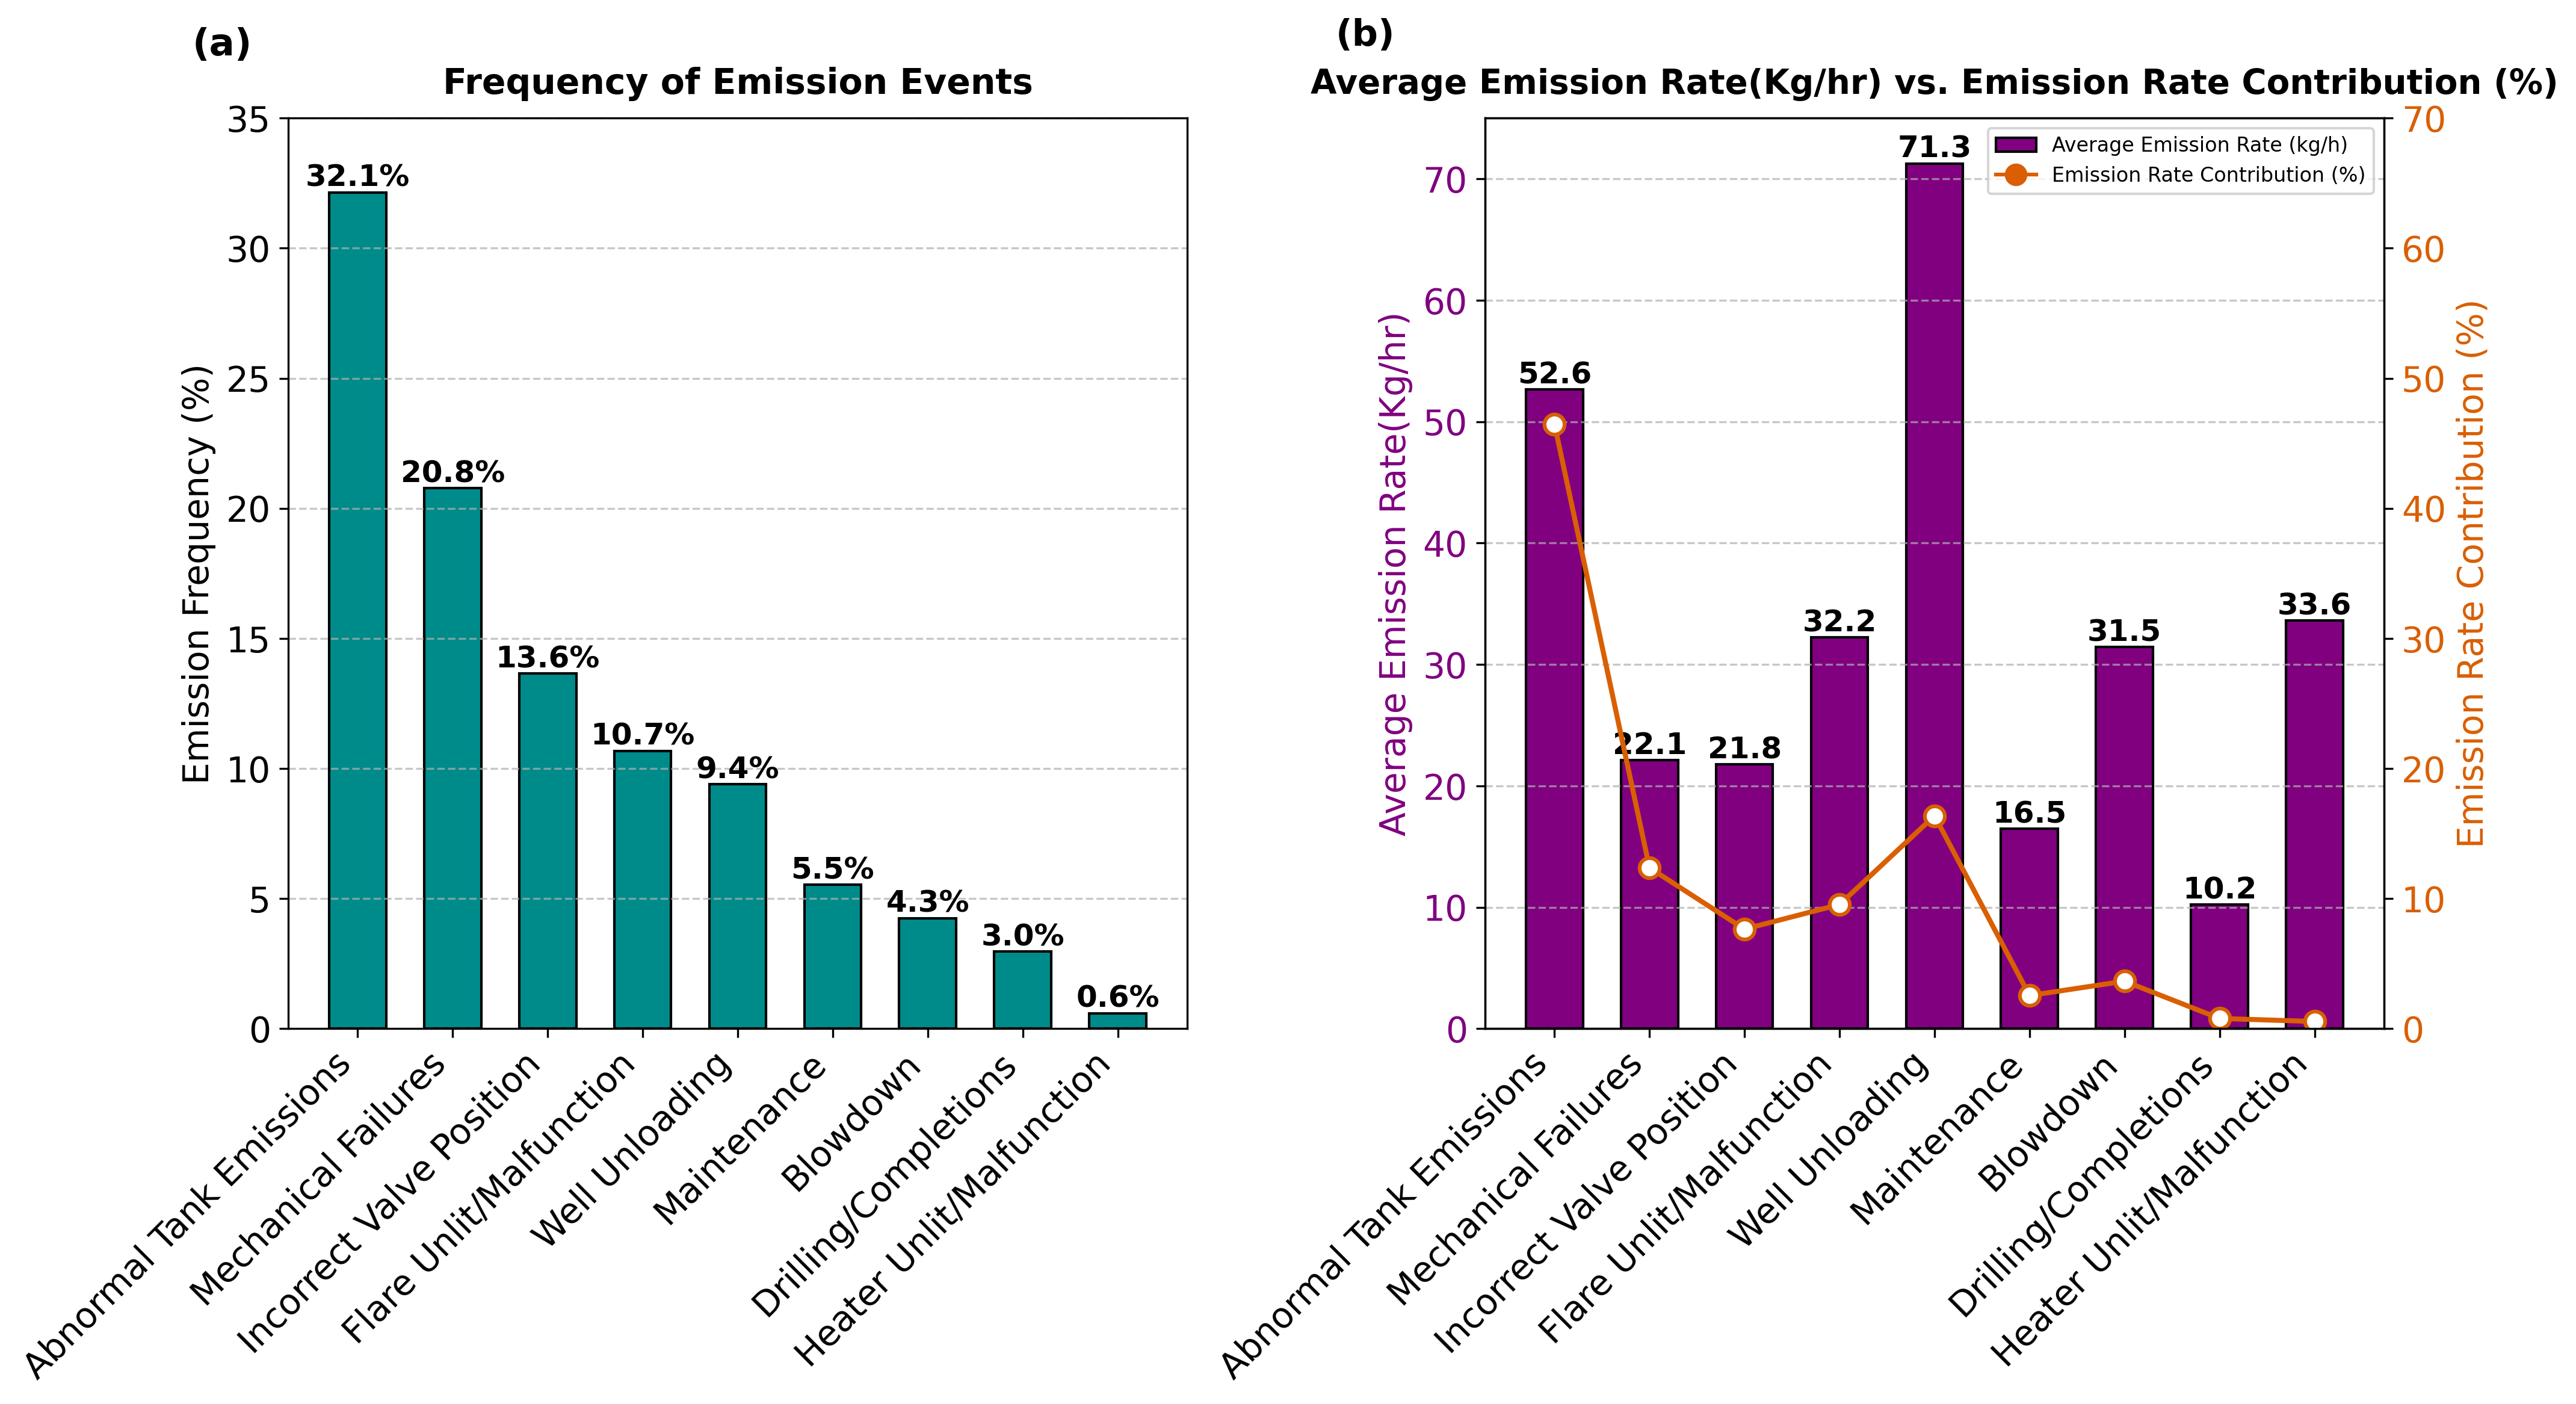

In [48]:
            #3.6b - Manuscrip Plot 1 combined- Frequency, rate contribution, and intensity combined of emission types with exclusions


# Prepare the data 
filtered_df = df[~df['Emission Type'].isin(excluded_categories)]
filtered_cause_distribution = filtered_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum()
filtered_total_emission = filtered_cause_distribution.sum()
filtered_percentage_distribution = (filtered_cause_distribution / filtered_total_emission) * 100
filtered_percentage_distribution = filtered_percentage_distribution.sort_values(ascending=False)
filtered_cause_distribution = filtered_cause_distribution.loc[filtered_percentage_distribution.index]

# FREQUENCY
filtered_cause_count_distribution = df[~df['Emission Type'].isin(excluded_categories)]['Emission Type'].value_counts()
filtered_total_count = len(df[~df['Emission Type'].isin(excluded_categories)]['Emission Type'].dropna())
filtered_percentage_count_distribution = (filtered_cause_count_distribution / filtered_total_count) * 100
sorted_percentage_count_distribution = filtered_percentage_count_distribution[filtered_percentage_distribution.index]

# AVERAGE EMISSION RATE
average_emission_rate = filtered_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].mean()
average_emission_rate_sorted = average_emission_rate.loc[filtered_percentage_distribution.index]

# Reorder everything based on frequency (CODE B logic)
order = sorted_percentage_count_distribution.sort_values(ascending=False).index
sorted_percentage_count_distribution = sorted_percentage_count_distribution.loc[order]
average_emission_rate_sorted = average_emission_rate_sorted.loc[order]
filtered_percentage_distribution = filtered_percentage_distribution.loc[order]
emission_types = order

# CODE C Plot only
fig, (ax_freq, ax_intensity) = plt.subplots(ncols=2, figsize=(14, 8), dpi=300)

# Subplot A - Frequency
bars_freq = ax_freq.bar(emission_types, sorted_percentage_count_distribution, width=0.6, color='darkcyan', edgecolor='black')
for i, etype in enumerate(emission_types):
    freq_value = sorted_percentage_count_distribution[etype]
    ax_freq.text(i, freq_value, f"{freq_value:.1f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')
ax_freq.set_title("Frequency of Emission Events", fontsize=14, fontweight='bold', y=1.01)
ax_freq.set_ylabel("Emission Frequency (%)", fontsize=14)
ax_freq.set_xticks(range(len(emission_types)))
ax_freq.set_xticklabels(emission_types, rotation=45, ha='right', fontsize=14)
ax_freq.tick_params(axis='y', labelsize=14)
ax_freq.set_ylim(0, 35)
ax_freq.grid(axis='y', linestyle='--', alpha=0.7)
ax_freq.text(-0.04, 1.1, "(a)", transform=ax_freq.transAxes, fontsize=15, fontweight='bold', va='top', ha='right')

# Subplot B - Intensity and Rate Contribution
bars_intensity = ax_intensity.bar(emission_types, average_emission_rate_sorted, width=0.6, color='purple', edgecolor='black')
for i, etype in enumerate(emission_types):
    intensity_val = average_emission_rate_sorted[etype]
    ax_intensity.text(i, intensity_val, f"{intensity_val:.1f}", ha='center', va='bottom', fontsize=12, fontweight='bold')
ax_intensity.set_title("Average Emission Rate(Kg/hr) vs. Emission Rate Contribution (%)", fontsize=13.5, fontweight='bold', y=1.01)
ax_intensity.set_ylabel("Average Emission Rate(Kg/hr)", fontsize=14, color='purple')
ax_intensity.tick_params(axis='y', labelcolor='purple', labelsize=14)
ax_intensity.set_xticks(range(len(emission_types)))
ax_intensity.set_xticklabels(emission_types, rotation=45, ha='right', fontsize=14)
ax_intensity.set_ylim(0, 75)
ax_intensity.grid(axis='y', linestyle='--', alpha=0.7)

# Secondary y-axis
dark_orange = '#D95F02'
ax_rate = ax_intensity.twinx()
ax_rate.plot(emission_types, filtered_percentage_distribution, color=dark_orange, marker='o', linestyle='-', linewidth=2,
             markersize=8, markerfacecolor='white', markeredgewidth=1.5, label='Emission Rate Contribution (%)')
ax_rate.set_ylabel("Emission Rate Contribution (%)", fontsize=14, color=dark_orange)
ax_rate.tick_params(axis='y', labelcolor=dark_orange, labelsize=14)
ax_rate.set_ylim(0, 45)
#ax_rate.set_yticks(np.arange(0, 61, 10))
ax_rate.set_yticks(np.arange(0, 80, 10))
ax_intensity.text(-0.1, 1.11, "(b)", transform=ax_intensity.transAxes, fontsize=14.5, fontweight='bold', va='top', ha='right')

# Legend
bar_legend = mpatches.Patch(facecolor='purple', edgecolor='black', label='Average Emission Rate (kg/h)')
line_legend = mlines.Line2D([], [], color=dark_orange, marker='o', markersize=8, linestyle='-', label='Emission Rate Contribution (%)')
ax_rate.legend(handles=[bar_legend, line_legend], loc='upper right', fontsize=8)

plt.tight_layout()
#plt.savefig("my_two_subplots_sorted_by_frequency_updated.png", dpi=300, bbox_inches='tight')
plt.show()


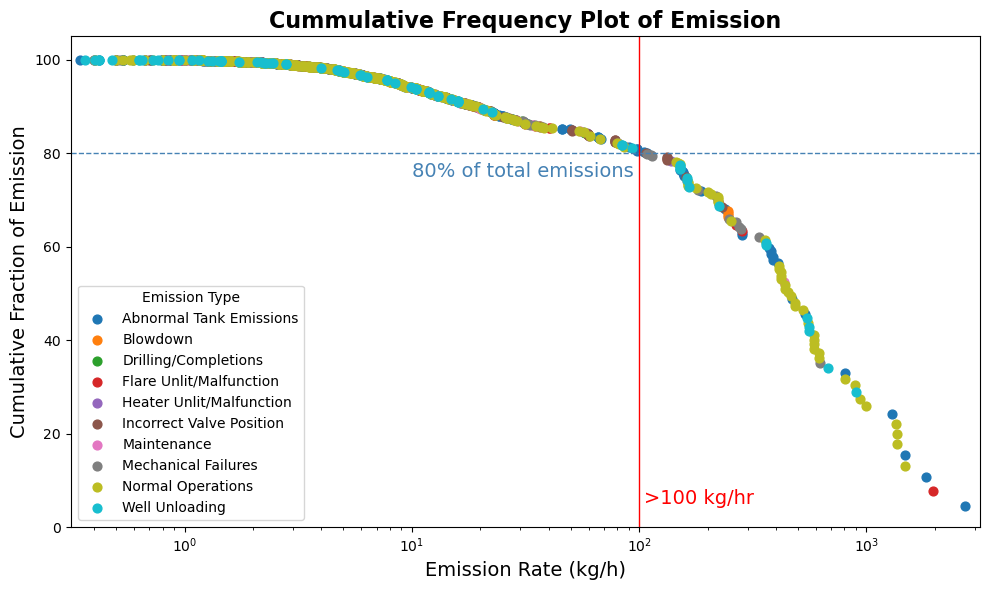

In [50]:
                                        # 3. 7a Superemission Cummulative Plot for all Emission Types

df_filtered = df[df['Emission Type'] != "Unknown 3rd party/ Unidentified"]  # drop the unwanted category
total_emissions = df_filtered['Avg Emission Rate (kg/h)'].sum()  # total emissions for normalization

df_survival = (df_filtered.sort_values(by='Avg Emission Rate (kg/h)', ascending=False).reset_index(drop=True)) # Sort Descending to build cumulative
df_survival['SurvivalFraction'] = (df_survival['Avg Emission Rate (kg/h)'].cumsum()  / total_emissions) * 100  # Descending cumulative fraction

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for etype, grp in df_survival.groupby('Emission Type'):ax.scatter(grp['Avg Emission Rate (kg/h)'],grp['SurvivalFraction'],label=etype, s=40)

ax.set_xlabel("Emission Rate (kg/h)", fontsize=14)
ax.set_ylabel("Cumulative Fraction of Emission", fontsize=14)
ax.set_title("Cummulative Frequency Plot of Emission",fontsize=16, fontweight='bold')
ax.set_xscale('log')  #log scale
ax.set_xlim(10**(-0.5), 10**3.5)
ax.set_ylim(0, 105)

# reference lines at 50% and 21 kg/hr
ax.axhline(80, color='steelblue', linestyle='--', linewidth=1)
ax.text(10**(1.0), 75, "80% of total emissions", color='steelblue', fontsize=14)
ax.axvline(100, color='red', linestyle='-', linewidth=1)
ax.text(105, 5, ">100 kg/hr", color='red', fontsize=14)
ax.legend(title="Emission Type", loc='best', fontsize=10) # legend

plt.tight_layout()
#plt.savefig("Cumm Fre Curve.png", dpi=300, bbox_inches='tight')
plt.show()

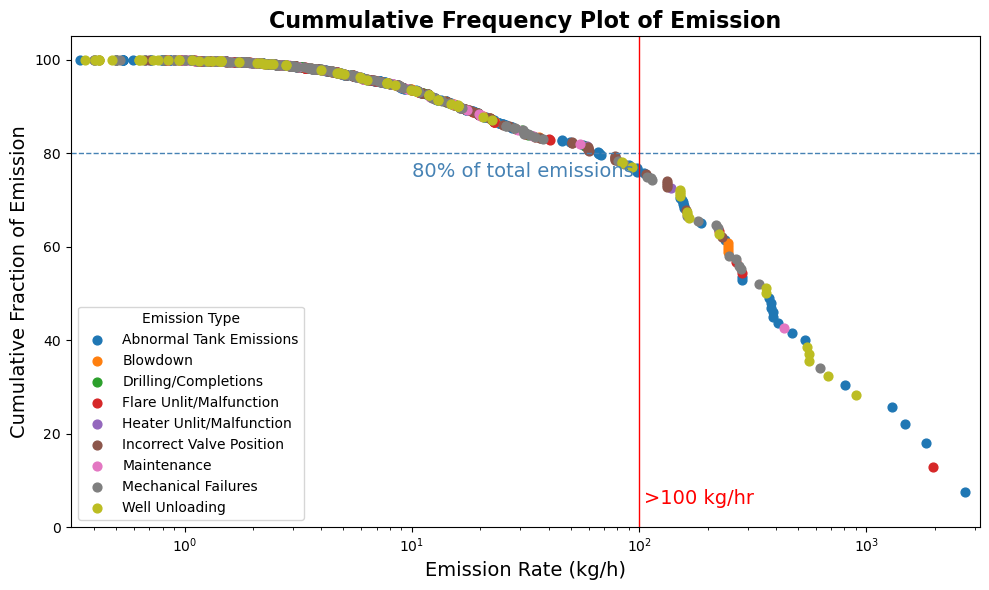

In [52]:
                                 # 3.7b Superemissions Plot With Exclusions

unwanted = ["Unknown 3rd party/ Unidentified", "Normal Operations"]     # drop both unwanted categories 
df_filtered = df[~df['Emission Type'].isin(unwanted)]
total_emissions = df_filtered['Avg Emission Rate (kg/h)'].sum()  # total emissions for normalization

df_survival = (df_filtered.sort_values(by='Avg Emission Rate (kg/h)', ascending=False).reset_index(drop=True))   # Sort Descending to build cumulative
df_survival['SurvivalFraction'] = (df_survival['Avg Emission Rate (kg/h)'].cumsum() / total_emissions) * 100   # Descending cumulative fraction

# Plot with scatter‐plot by Emission Type
fig, ax = plt.subplots(figsize=(10, 6))
for etype, grp in df_survival.groupby('Emission Type'):ax.scatter(grp['Avg Emission Rate (kg/h)'],grp['SurvivalFraction'],label=etype, s=40)
ax.set_xlabel("Emission Rate (kg/h)", fontsize=14)
ax.set_ylabel("Cumulative Fraction of Emission", fontsize=14)
ax.set_title("Cummulative Frequency Plot of Emission",fontsize=16, fontweight='bold')
ax.set_xscale('log')  # log-scale 
ax.set_xlim(10**(-0.5), 10**3.5)   # x-limits
ax.set_ylim(0, 105)    # y-limits

# reference lines at 50% and 21 kg/hr
ax.axhline(80, color='steelblue', linestyle='--', linewidth=1)
ax.text(10**(1.0), 75, "80% of total emissions", color='steelblue', fontsize=14)
ax.axvline(100, color='red', linestyle='-', linewidth=1)
ax.text(105, 5, ">100 kg/hr", color='red', fontsize=14)
ax.legend(title="Emission Type", loc='best', fontsize=10) # legend
plt.tight_layout()
#plt.savefig("Cumm Fre Curve withouth NO.png", dpi=300, bbox_inches='tight')
plt.show()

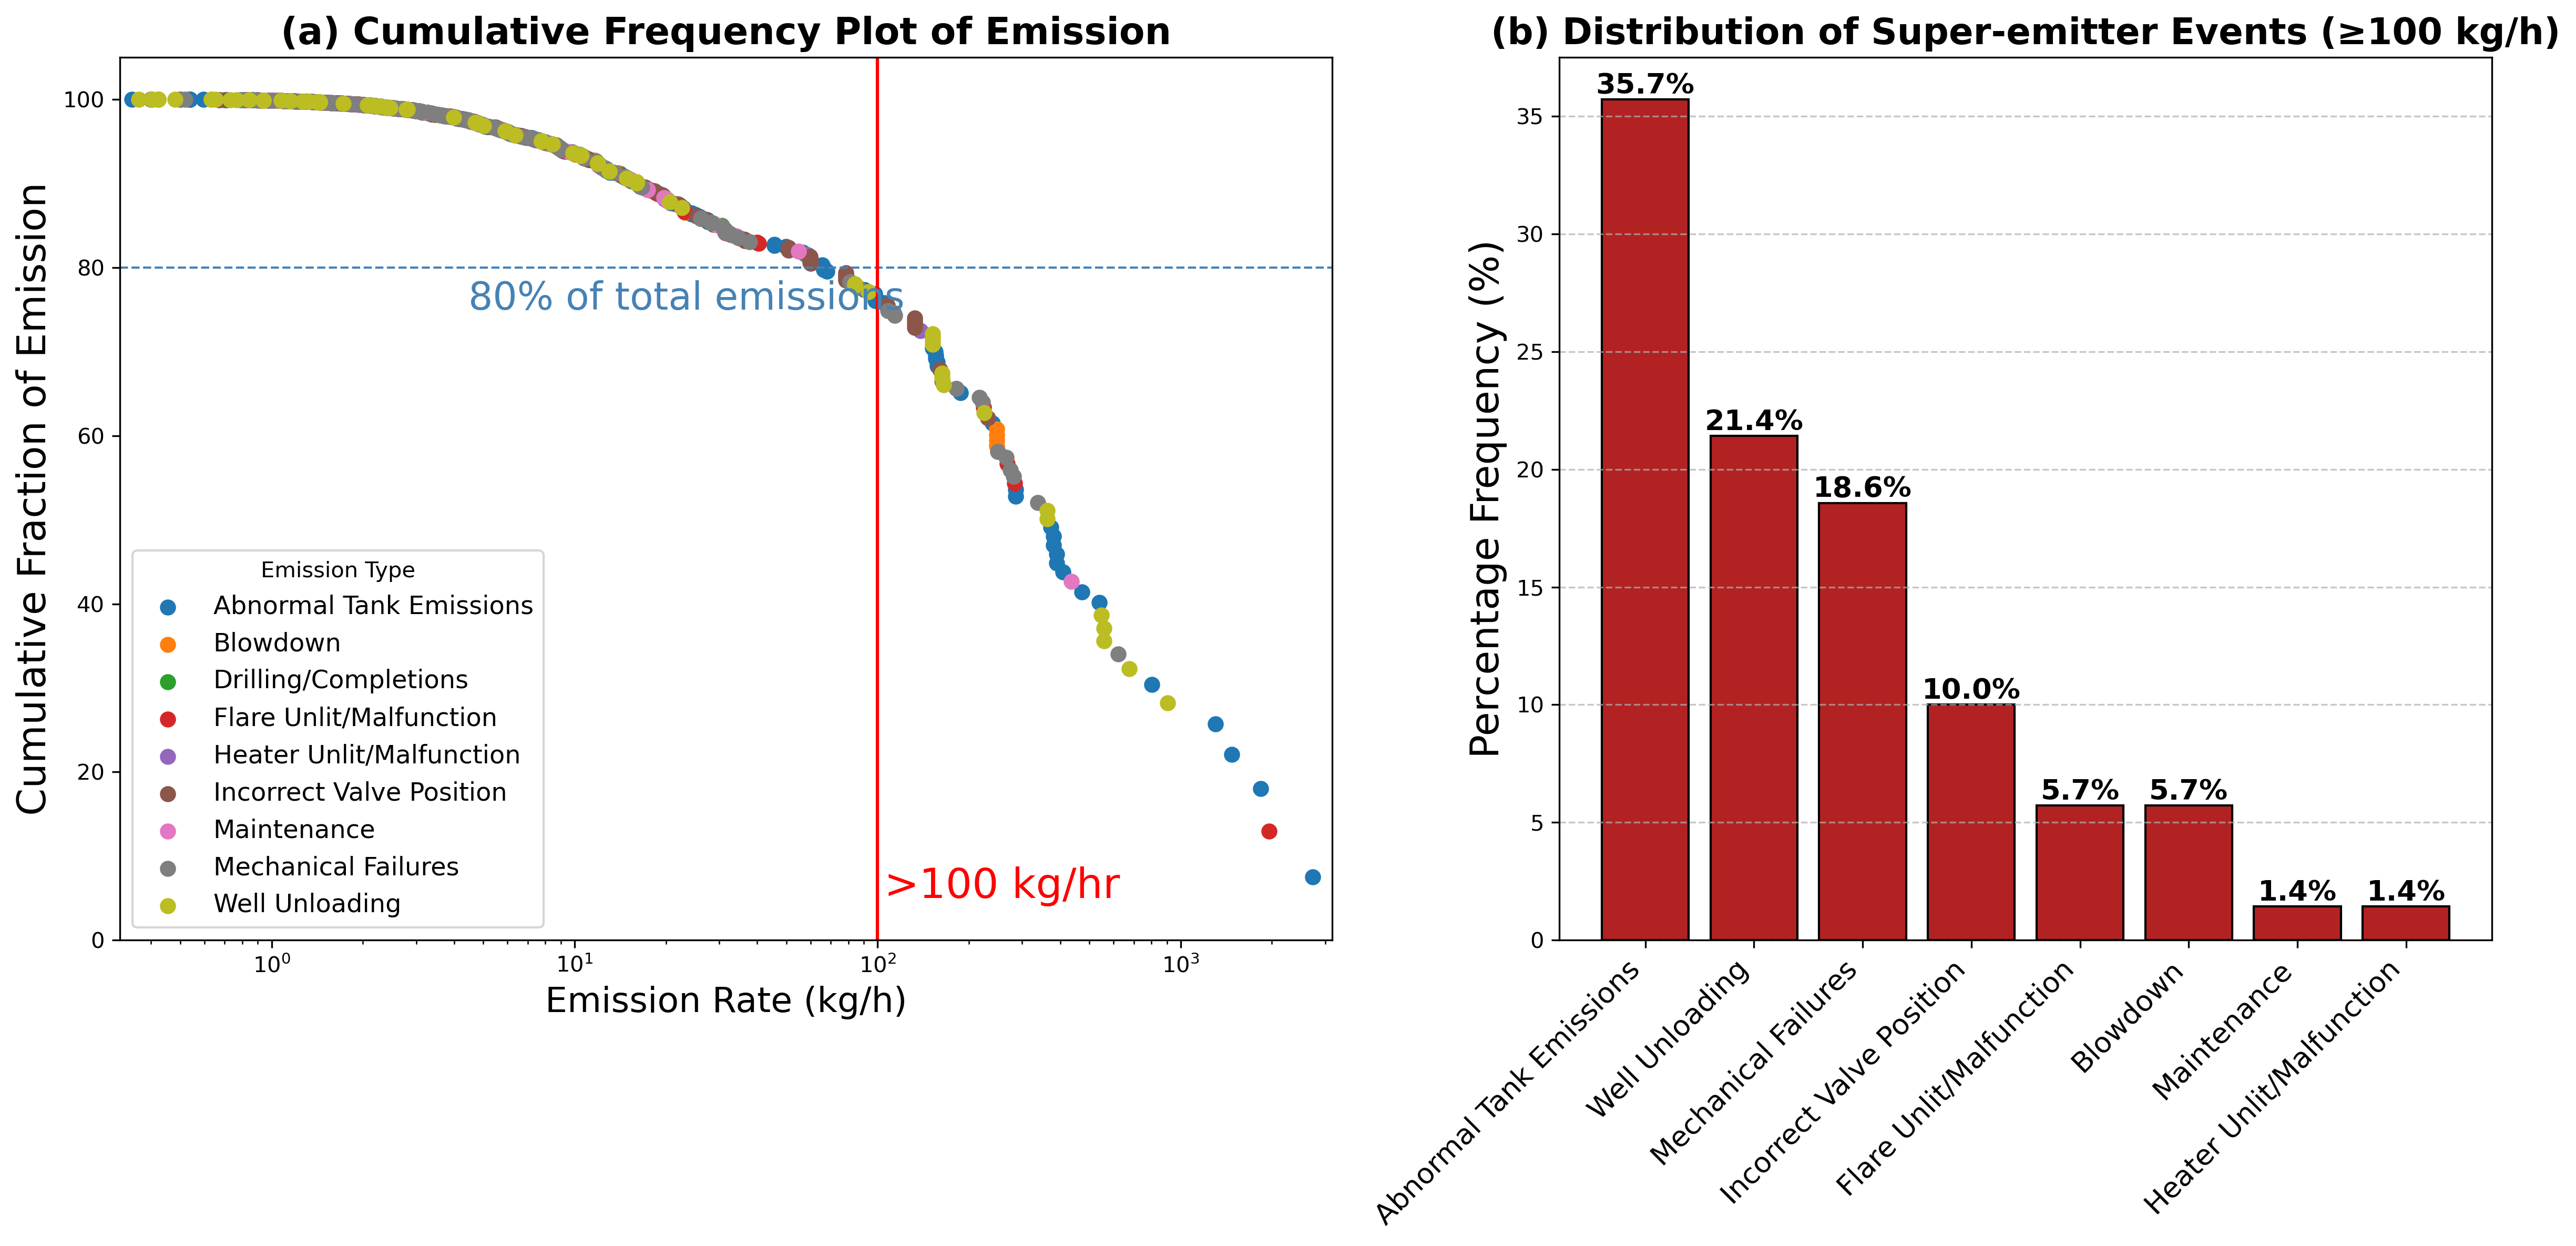

In [56]:
                          # 3.7c - Manuscript Plot 2 - Superemissions Plot With Superemission events counts

# Data Preparation for Plot (a) 
unwanted = ["Unknown 3rd party/ Unidentified", "Normal Operations"]
df_filtered = df[~df['Emission Type'].isin(unwanted)]
total_emissions = df_filtered['Avg Emission Rate (kg/h)'].sum()

df_survival = df_filtered.sort_values(by='Avg Emission Rate (kg/h)', ascending=False).reset_index(drop=True)
df_survival['SurvivalFraction'] = (df_survival['Avg Emission Rate (kg/h)'].cumsum() / total_emissions) * 100

# Data Preparation for Plot (b) 
excluded_categories = ["Others", "Unknown 3rd party/ Unidentified", "Normal Operations"]
high_emitters_df = df[(~df['Emission Type'].isin(excluded_categories)) & (df['Avg Emission Rate (kg/h)'] >= 100)]
high_emitter_counts = high_emitters_df['Emission Type'].value_counts()
high_emitter_total = len(high_emitters_df)
high_emitter_percentages = (high_emitter_counts / high_emitter_total) * 100

# Combined Plot with Adjusted Widths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=300, gridspec_kw={'width_ratios': [1.3, 1]})  # Plot (a) is wider

# Plot (a): Cumulative Frequency 
for etype, grp in df_survival.groupby('Emission Type'):
    ax1.scatter(grp['Avg Emission Rate (kg/h)'], grp['SurvivalFraction'], label=etype, s=40)
ax1.set_xlabel("Emission Rate (kg/h)", fontsize=16)
ax1.set_ylabel("Cumulative Fraction of Emission", fontsize=18)
ax1.set_title("(a) Cumulative Frequency Plot of Emission", fontsize=17, fontweight='bold')
ax1.set_xscale('log')
ax1.set_xlim(10**(-0.5), 10**3.5)
ax1.set_ylim(0, 105)
ax1.axhline(80, color='steelblue', linestyle='--', linewidth=1)
ax1.text(10**(0.65), 75, "80% of total emissions", color='steelblue', fontsize=17.5)
ax1.axvline(100, color='red', linestyle='-', linewidth=1.5)
ax1.text(105, 5, ">100 kg/hr", color='red', fontsize=19)
ax1.legend(title="Emission Type", fontsize=11.5)

# Plot (b): High Emission Count Distribution with Percentage Labels 
bars = ax2.bar(high_emitter_percentages.index, high_emitter_percentages.values, color='firebrick', edgecolor='black')
for index, value in enumerate(high_emitter_percentages):
    ax2.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=13, fontweight='bold')
ax2.set_title("(b) Distribution of Super-emitter Events (≥100 kg/h)", fontsize=16.5, fontweight='bold')
ax2.set_ylabel("Percentage Frequency (%)", fontsize=18)
ax2.set_xticks(range(len(high_emitter_percentages)))
ax2.set_xticklabels(high_emitter_percentages.index, rotation=45, ha='right', fontsize=13)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("combined_emission_plots_updated.png", dpi=300, bbox_inches='tight')
plt.show()


In [58]:
                            # 3.7d  Superemission Quick Statistics Count With Normal Operations

df_filtered = df[df['Emission Type'] != "Unknown 3rd party/ Unidentified"]   # filter out the unwanted

threshold = 21
# Events below 21 kg/hr
below = df_filtered[df_filtered['Avg Emission Rate (kg/h)'] < threshold]
n_below = below.shape[0]

# Events at or above 21 kg/hr
above = df_filtered[df_filtered['Avg Emission Rate (kg/h)'] >= threshold]
n_above = above.shape[0]

print(f"Number of events with rate < {threshold} kg/hr: {n_below}")
print(f"Number of events with rate ≥ {threshold} kg/hr: {n_above}")

total = df_filtered.shape[0]
print(f"Fraction below: {n_below/total*100:.1f}%")
print(f"Fraction above: {n_above/total*100:.1f}%")

print("Counts by Emission Type (below threshold):")
print(below['Emission Type'].value_counts())

print("\nCounts by Emission Type (above threshold):")
print(above['Emission Type'].value_counts())

Number of events with rate < 21 kg/hr: 1156
Number of events with rate ≥ 21 kg/hr: 243
Fraction below: 79.8%
Fraction above: 16.8%
Counts by Emission Type (below threshold):
Emission Type
Normal Operations           355
Abnormal Tank Emissions     257
Mechanical Failures         175
Incorrect Valve Position     96
Flare Unlit/Malfunction      94
Well Unloading               64
Maintenance                  51
Blowdown                     36
Drilling/Completions         24
Heater Unlit/Malfunction      4
Name: count, dtype: int64

Counts by Emission Type (above threshold):
Emission Type
Normal Operations           74
Abnormal Tank Emissions     62
Incorrect Valve Position    31
Mechanical Failures         27
Well Unloading              19
Flare Unlit/Malfunction     13
Blowdown                     6
Maintenance                  5
Drilling/Completions         4
Heater Unlit/Malfunction     2
Name: count, dtype: int64


In [60]:
                         # 3.7e Superemission Statistics Without Exclusions #Similar to the above

unwanted = ["Unknown 3rd party/ Unidentified", "Normal Operations"]   # define unwanted categories
df_filtered = df[~df['Emission Type'].isin(unwanted)]  # filter out the unwanted

threshold = 100

# Events below 21 kg/hr
below = df_filtered[df_filtered['Avg Emission Rate (kg/h)'] < threshold]
n_below = below.shape[0]

# Events at or above 21 kg/hr
above = df_filtered[df_filtered['Avg Emission Rate (kg/h)'] >= threshold]
n_above = above.shape[0]

print(f"Number of events with rate < {threshold} kg/hr: {n_below}")
print(f"Number of events with rate ≥ {threshold} kg/hr: {n_above}")

total = df_filtered.shape[0]
print(f"Fraction below: {n_below/total*100:.1f}%")
print(f"Fraction above: {n_above/total*100:.1f}%")

print("Counts by Emission Type (below threshold):")
print(below['Emission Type'].value_counts())

print("\nCounts by Emission Type (above threshold):")
print(above['Emission Type'].value_counts())

Number of events with rate < 100 kg/hr: 900
Number of events with rate ≥ 100 kg/hr: 70
Fraction below: 89.0%
Fraction above: 6.9%
Counts by Emission Type (below threshold):
Emission Type
Abnormal Tank Emissions     294
Mechanical Failures         189
Incorrect Valve Position    120
Flare Unlit/Malfunction     103
Well Unloading               68
Maintenance                  55
Blowdown                     38
Drilling/Completions         28
Heater Unlit/Malfunction      5
Name: count, dtype: int64

Counts by Emission Type (above threshold):
Emission Type
Abnormal Tank Emissions     25
Well Unloading              15
Mechanical Failures         13
Incorrect Valve Position     7
Flare Unlit/Malfunction      4
Blowdown                     4
Maintenance                  1
Heater Unlit/Malfunction     1
Name: count, dtype: int64


In [93]:
                #4.1c CHI-TEST FOR TEMPORAL VARIATION OF EMISSION CAUSES

from scipy.stats import chisquare
quarters_to_compare = [1, 2, 3, 4]
quarter_filtered_df = df[df['Quarter'].isin(quarters_to_compare)]
exclusion_types = ["Normal Operations", "Unknown 3rd party/ Unidentified", "Heater Unlit/Malfunction", "Drilling/Completions"]
quarter_filtered_df = quarter_filtered_df[~quarter_filtered_df['Emission Type'].isin(exclusion_types)]

# We create a percentage distribution table
# Group by Quarter, get normalized percentage counts, then unstack and transpose such that rows are emission types.
quarter_cause_distribution = (quarter_filtered_df.groupby('Quarter')['Emission Type'].value_counts(normalize=True).mul(100).unstack()).T
print("Percentage Distribution (Emission Type x Quarter):")
print(quarter_cause_distribution)

# Run the Chi-Square Goodness-of-Fit Test per Emission Type using percentages 
# Instead of assuming total=100, we calculate the sum of observed percentages for each emission type.
print("\nChi-Square Goodness of Fit Test per Emission Type (Percentages):")
for emission, row in quarter_cause_distribution.iterrows():
    # Retrieve observed percentages and replace NaN (if any missing quarters) with 0.
    observed = np.nan_to_num(row.values.astype(float))
    # Total observed percentages 
    total_observed = observed.sum()
    
    # Generate expected percentages based on a uniform distribution.
    expected = np.full(observed.shape, total_observed / len(observed))

    # Perform the Chi-Square test on the percentage data.
    chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
    
    print(f"\nEmission Type: {emission}")
    print("Observed Percentages:", observed)
    print("Expected Percentages:", expected)
    print("Chi-square Statistic: {:.3f}".format(chi2_stat))
    print("p-value: {:.5f}".format(p_val))

Percentage Distribution (Emission Type x Quarter):
Quarter                           1          2          3          4
Emission Type                                                       
Abnormal Tank Emissions   43.103448  28.242075  32.460733  34.220532
Blowdown                   5.747126   6.051873   3.141361   2.281369
Flare Unlit/Malfunction   12.643678   6.340058  13.089005  14.828897
Incorrect Valve Position  16.091954  18.155620   7.853403  12.167300
Maintenance                6.321839   2.017291  16.753927   2.281369
Mechanical Failures       13.793103  30.547550  17.801047  17.490494
Well Unloading             2.298851   8.645533   8.900524  16.730038

Chi-Square Goodness of Fit Test per Emission Type (Percentages):

Emission Type: Abnormal Tank Emissions
Observed Percentages: [43.10344828 28.24207493 32.46073298 34.22053232]
Expected Percentages: [34.50669713 34.50669713 34.50669713 34.50669713]
Chi-square Statistic: 3.403
p-value: 0.33360

Emission Type: Blowdown
Observed

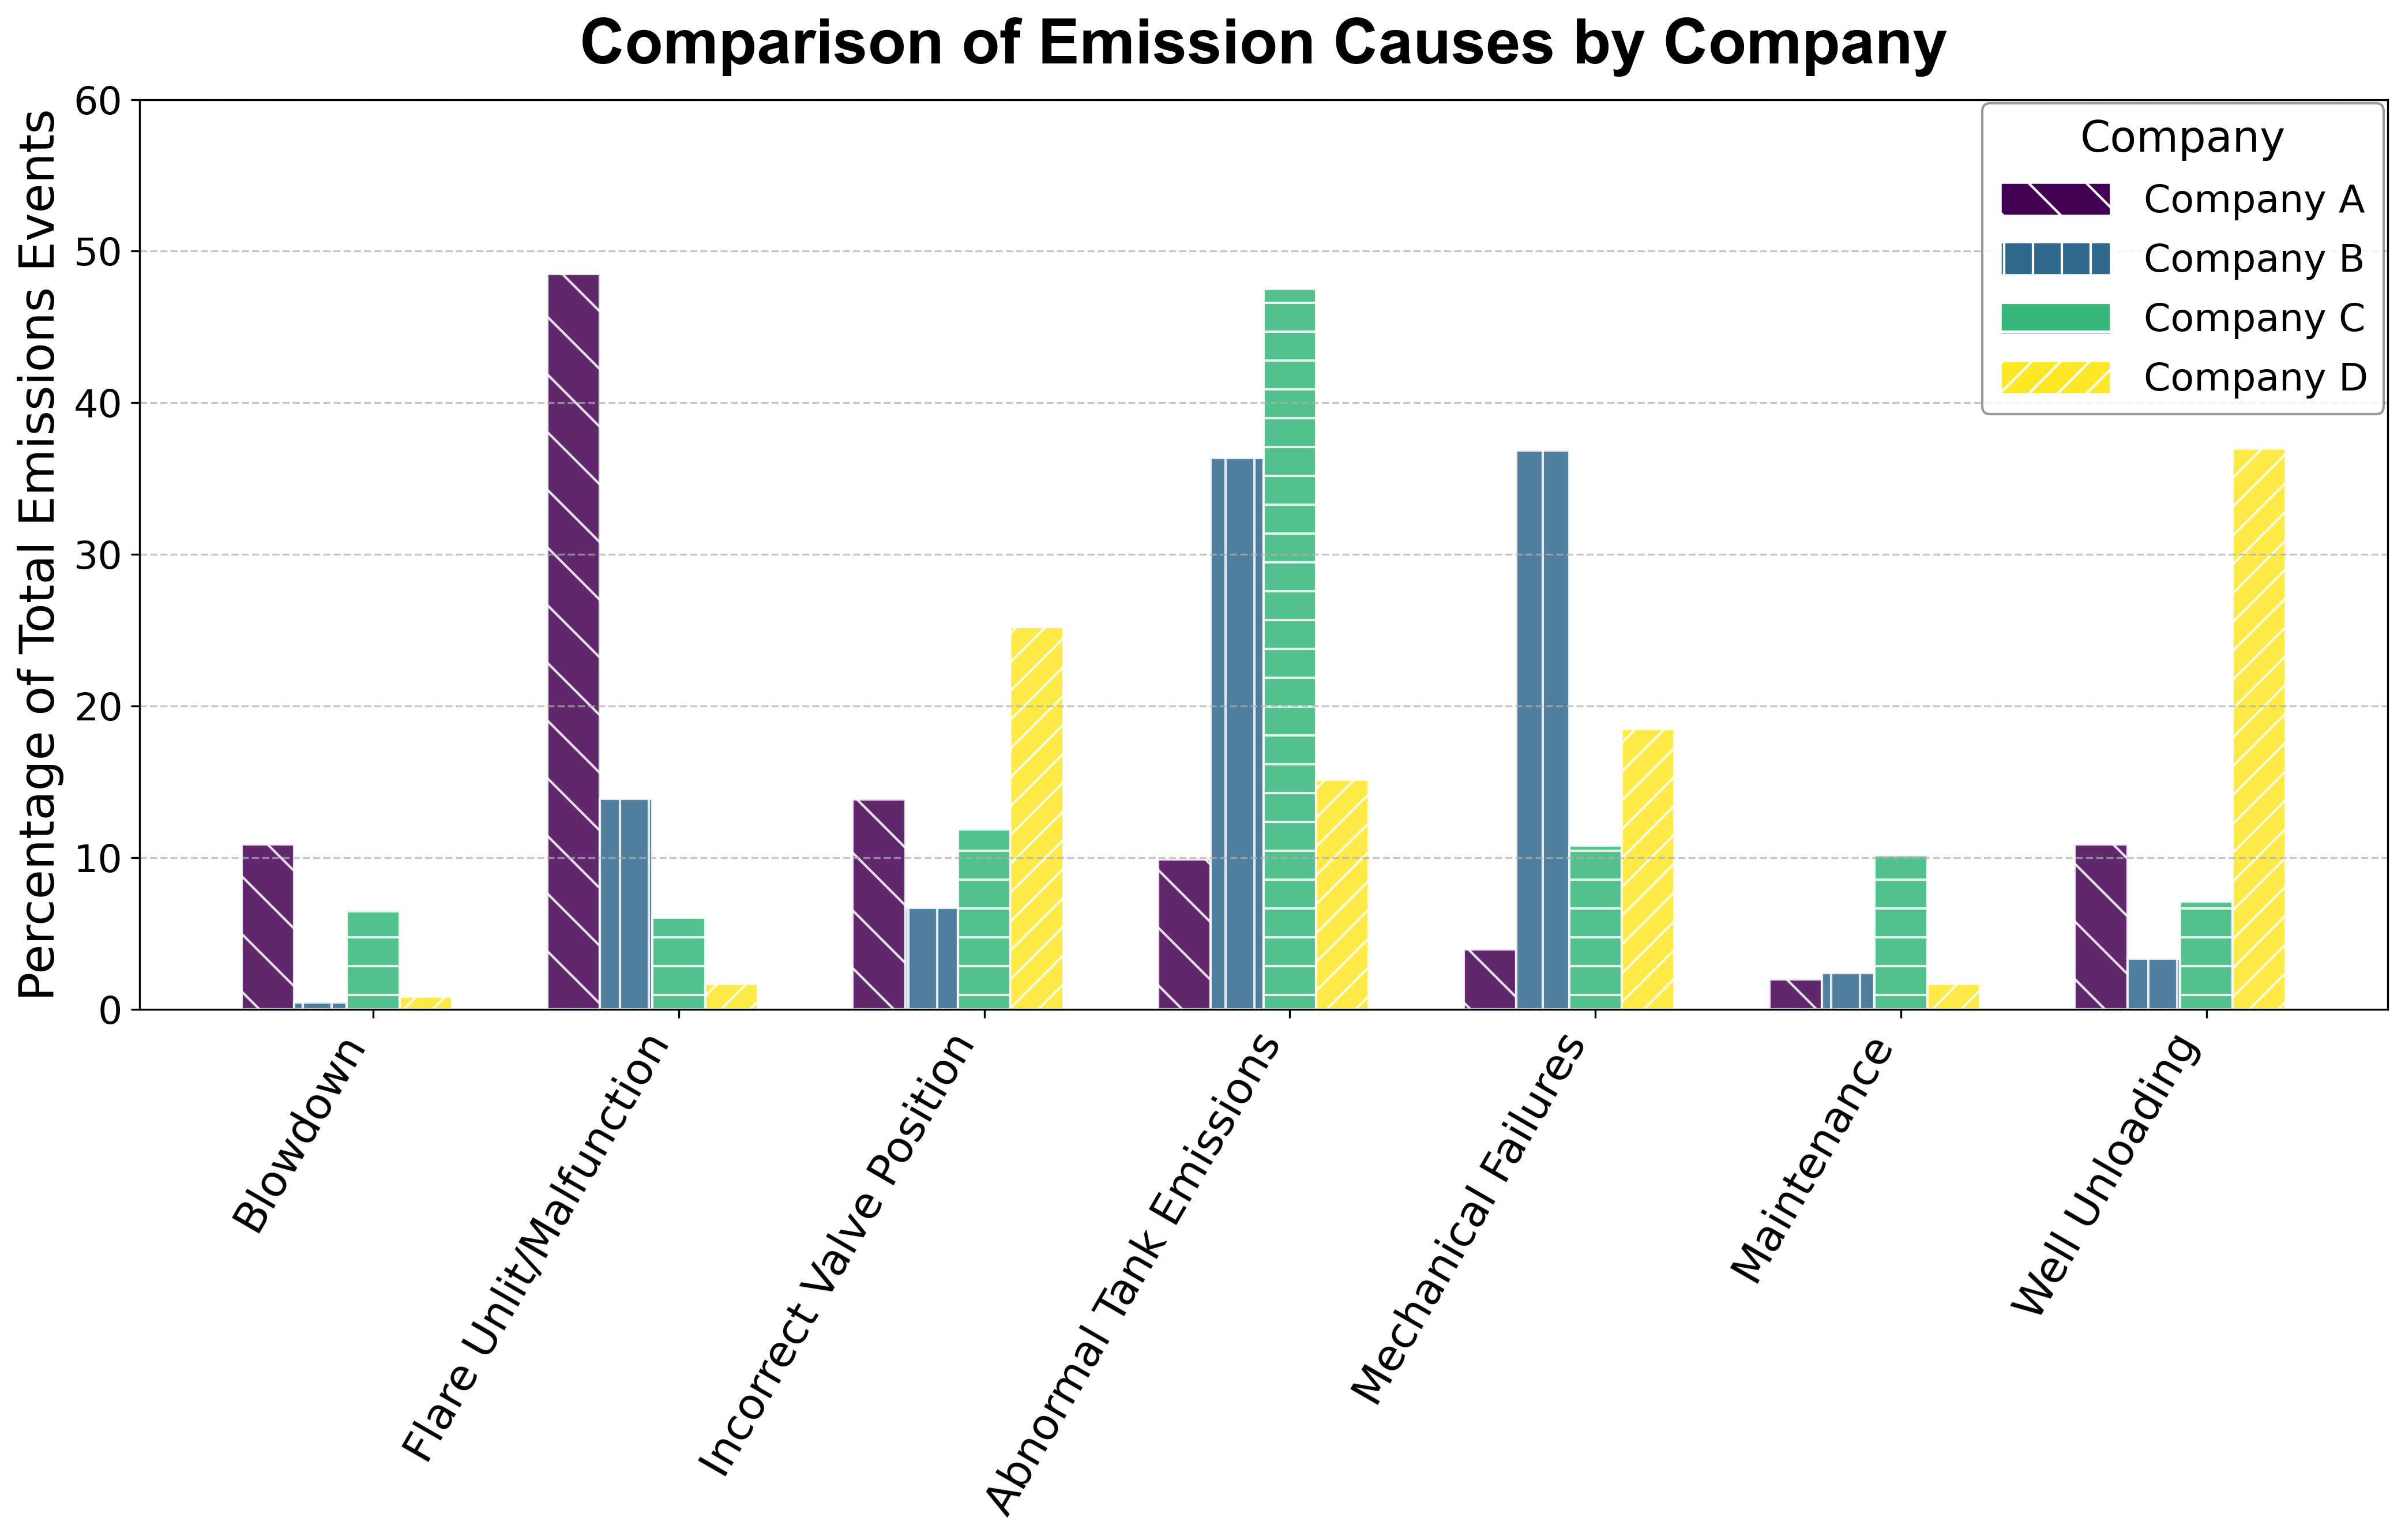

In [86]:
  # 4.4 - MANUSCRIPT figure 6: BY COMPANY COMPARISON OF EMISSION EVENTS BY EMISSION TYPES

# List of companies to compare 
companies_to_compare = ["Company C", "Company B", "Company A", "Company D"]
company_filtered_df = df[df['COMPANY'].isin(companies_to_compare)]

# Exclusion of specific emission types
exclusion_types = ["Normal Operations", "Unknown 3rd party/ Unidentified", "Heater Unlit/Malfunction", "Drilling/Completions"]
company_filtered_df = company_filtered_df[~company_filtered_df['Emission Type'].isin(exclusion_types)]

# Calculating the percentage distribution of emission types by company
company_cause_distribution = (company_filtered_df.groupby('COMPANY')['Emission Type'].value_counts(normalize=True).mul(100).unstack())
data = company_cause_distribution.T

# Aligning emission type order
custom_order = ["Blowdown", "Flare Unlit/Malfunction", "Incorrect Valve Position", "Abnormal Tank Emissions", "Mechanical Failures", "Maintenance", "Well Unloading"]
data = data.loc[[etype for etype in custom_order if etype in data.index]]
groups = list(data.index)

# List of companies (use original company names now)
companies = list(data.columns)  # 'companies' = columns (appearing in legend)

n_groups = len(groups)  # Number of emission types
n_bars = len(companies)  # Number of companies per emission type

# Spacing parameters
bar_width = 0.125
group_gap = 0.225
total_group_width = n_bars * bar_width
group_positions = np.arange(n_groups) * (total_group_width + group_gap)

# Colors & hatch patterns
cmap = plt.get_cmap('viridis', n_bars)
colors = [cmap(i) for i in range(n_bars)]
hatches = ['\\', '|', '-', '//']  # Distinct hatch patterns

# Plot
fig, ax = plt.subplots(figsize=(14, 9), dpi=300)
for i, emission_type in enumerate(groups):
    row_data = data.loc[emission_type]
    for j, company in enumerate(companies):
        x_pos = group_positions[i] + j * bar_width
        y_val = row_data[company] if pd.notna(row_data[company]) else 0
        ax.bar(x_pos, y_val, width=bar_width, color=colors[j], edgecolor='white', alpha=0.85, linewidth=1, hatch=hatches[j % len(hatches)])

# Center the x-ticks under each group of bars
group_centers = group_positions + (n_bars * bar_width) / 2
ax.set_xticks(group_centers)
ax.set_xticklabels(groups, rotation=60, ha='right', fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("Percentage of Total Emissions Events", fontsize=20)
ax.set_ylim(0, 60)
ax.set_title("Comparison of Emission Causes by Company", fontsize=26, fontweight='bold', fontname="Arial", pad=15)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Create legend handles for companies directly (no mapping needed now)
legend_handles = [ mpatches.Patch(facecolor=colors[j], edgecolor='white', label=companies[j], hatch=hatches[j % len(hatches)], linewidth=3, fill=True) 
    for j in range(n_bars)]

# Create the legend for the companies with hatch patterns
ax.legend(handles=legend_handles, title="Company", loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.1, fontsize=16, title_fontsize=18, 
    frameon=True, edgecolor='gray', handlelength=3, handleheight=1.15)

# Display the plot and save the figure
plt.tight_layout()
#plt.savefig('gptemission_distribution_by_company_transposed.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [88]:
                  # 4.4b STATS FOR OMPANY COMPARISON OF EMISSION EVENTS BY EMISSION TYPES

print("Percentage Distribution (Emission Type x Quarter):")
bb = company_cause_distribution.T
print(bb)

# Run the Chi-Square Goodness-of-Fit Test per Emission Type using percentages
print("\nChi-Square Goodness of Fit Test per Emission Type (Percentages):")
for emission, row in bb.iterrows():
    # Retrieve observed percentages and replace NaN (if any missing quarters) with 0.
    observed = np.nan_to_num(row.values.astype(float))
    
    # Total observed percentages
    total_observed = observed.sum()
    
    # Generate expected percentages based on a uniform distribution.
    expected = np.full(observed.shape, total_observed / len(observed))
    
    # Perform the Chi-Square test on the percentage data.
    chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
    
    print(f"\nEmission Type: {emission}")
    print("Observed Percentages:", observed)
    print("Expected Percentages:", expected)
    print("Chi-square Statistic: {:.3f}".format(chi2_stat))
    print("p-value: {:.5f}".format(p_val))

Percentage Distribution (Emission Type x Quarter):
COMPANY                   Company A  Company B  Company C  Company D
Emission Type                                                       
Abnormal Tank Emissions    9.900990  36.363636  47.516199  15.126050
Blowdown                  10.891089   0.478469   6.479482   0.840336
Flare Unlit/Malfunction   48.514851  13.875598   6.047516   1.680672
Incorrect Valve Position  13.861386   6.698565  11.879050  25.210084
Maintenance                1.980198   2.392344  10.151188   1.680672
Mechanical Failures        3.960396  36.842105  10.799136  18.487395
Well Unloading            10.891089   3.349282   7.127430  36.974790

Chi-Square Goodness of Fit Test per Emission Type (Percentages):

Emission Type: Abnormal Tank Emissions
Observed Percentages: [ 9.9009901  36.36363636 47.5161987  15.12605042]
Expected Percentages: [27.2267189 27.2267189 27.2267189 27.2267189]
Chi-square Statistic: 34.589
p-value: 0.00000

Emission Type: Blowdown
Observed Pe

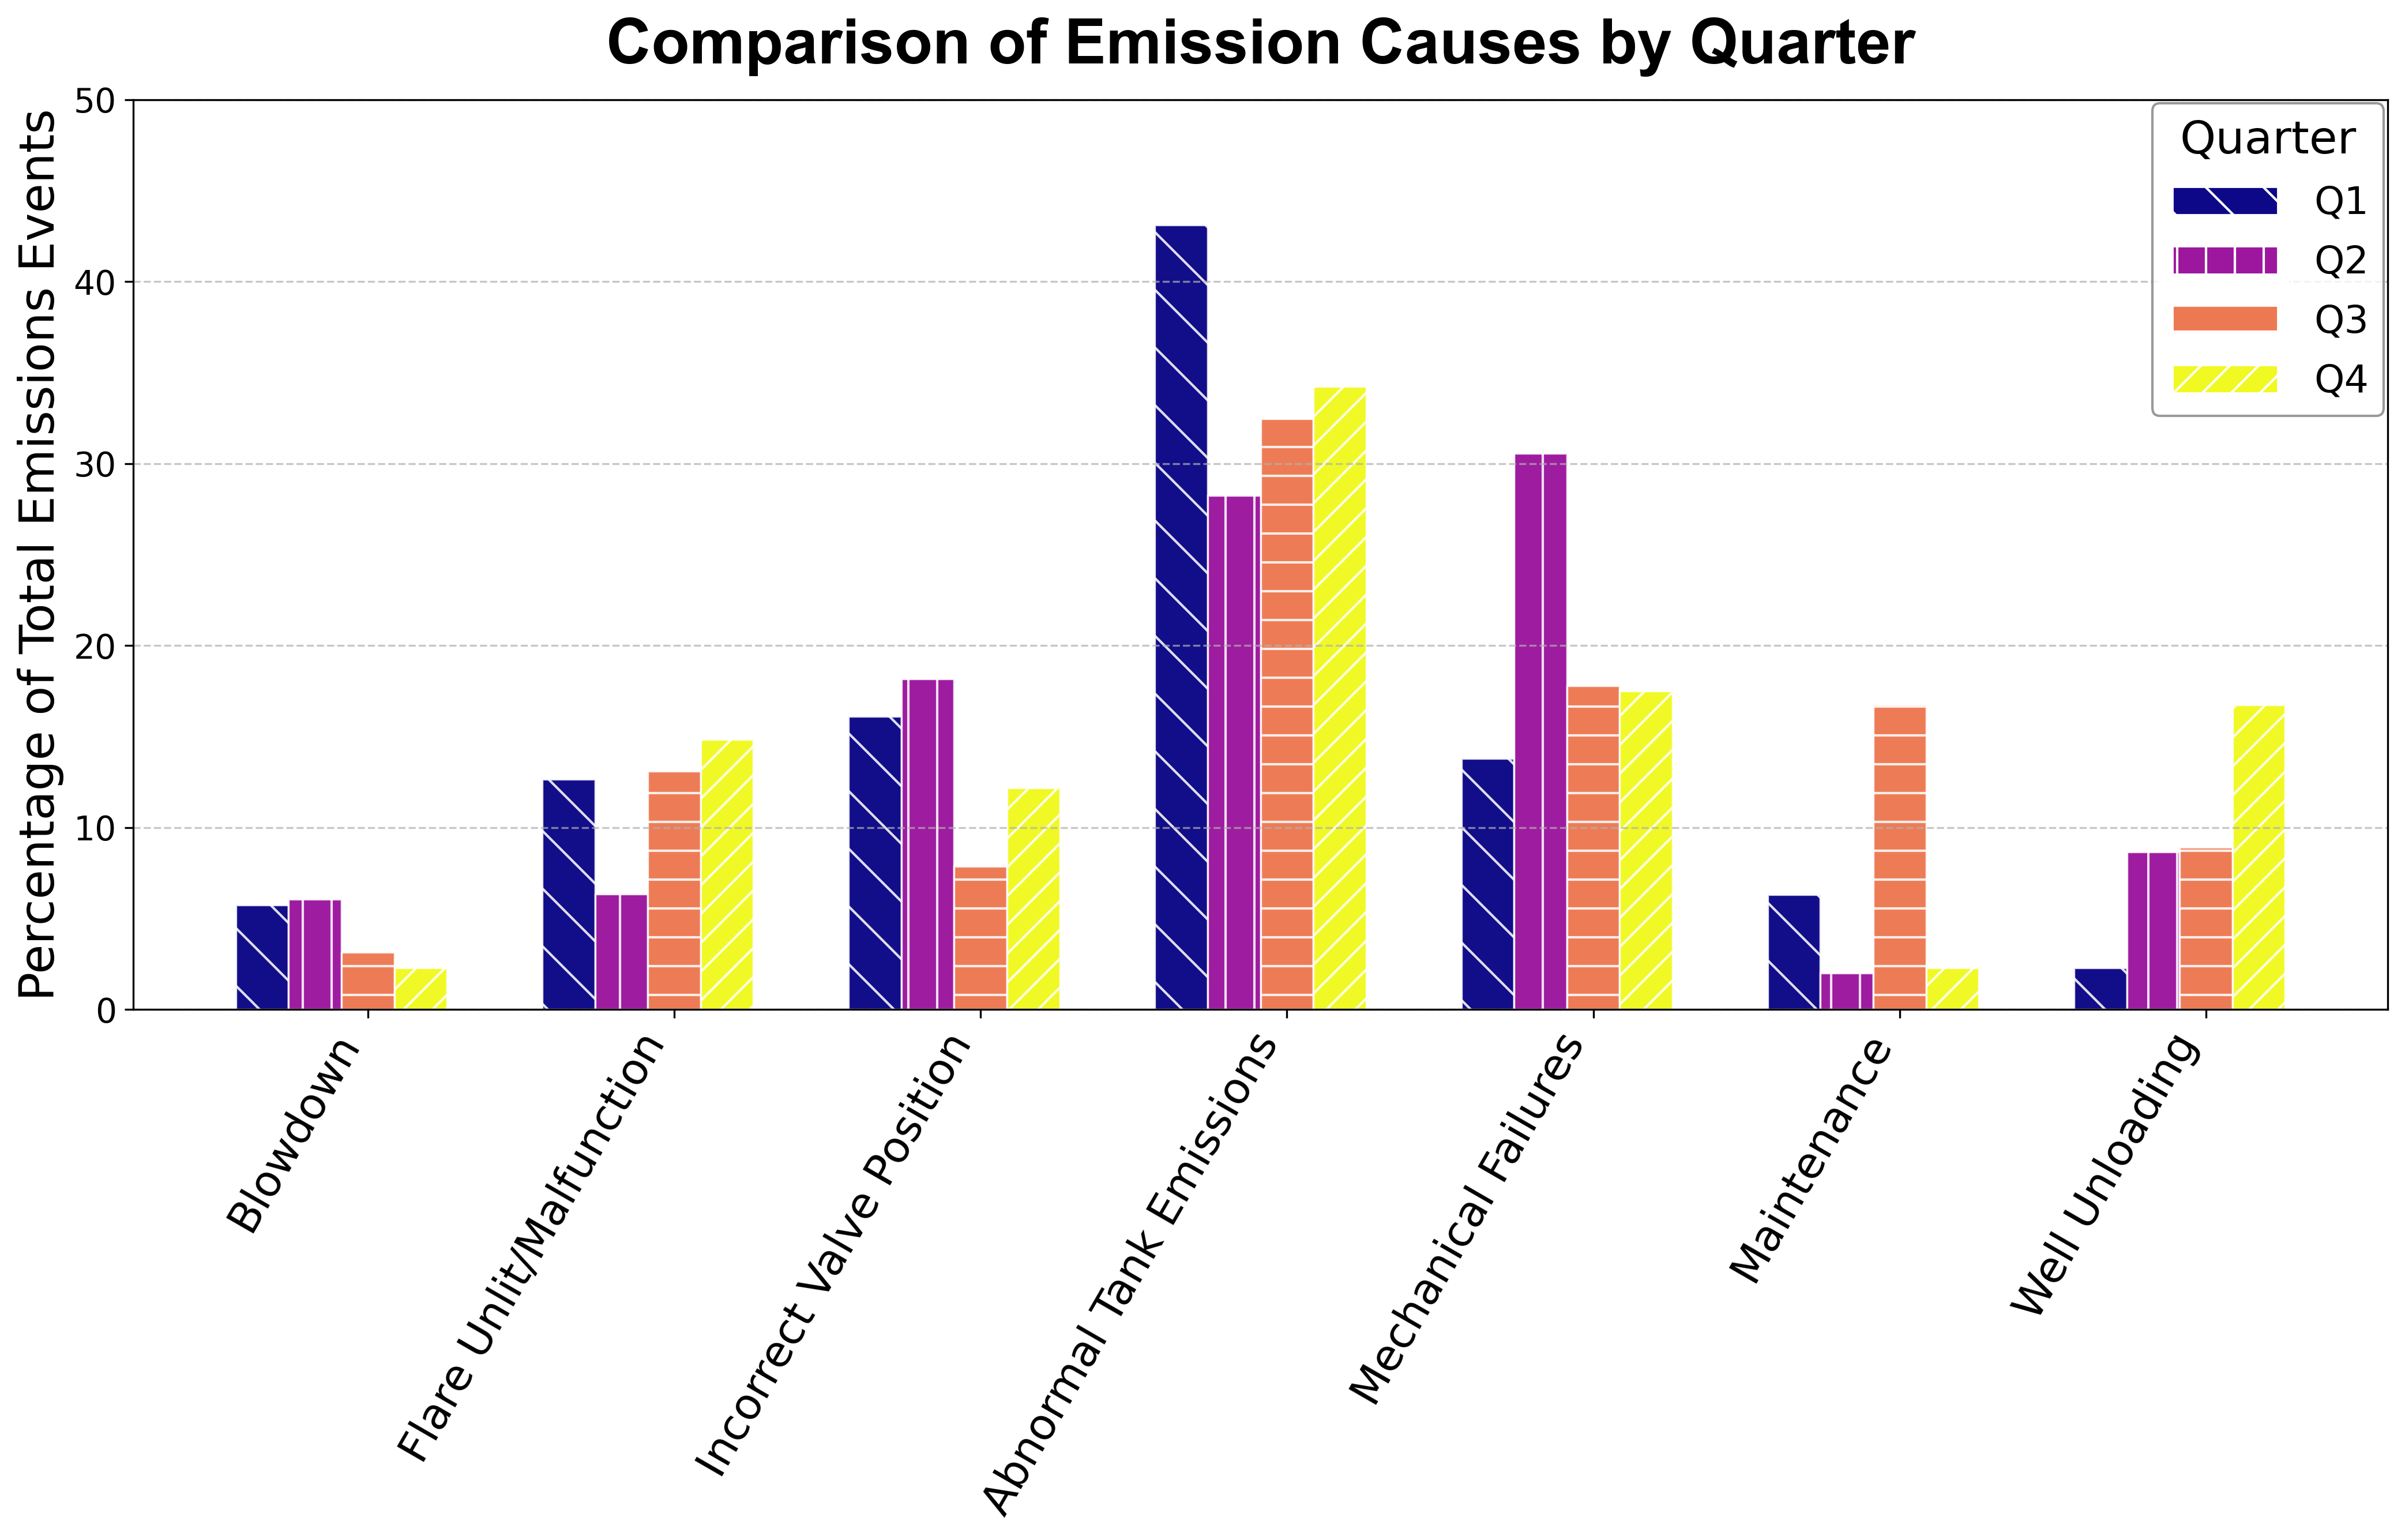

In [94]:
                            # 4.5 MANUSCRIPT FIGURE 5: BY QUARTER COMPARISON FOR EMISSION TYPES

quarters_to_compare = [1, 2, 3, 4] 
quarter_filtered_df = df[df['Quarter'].isin(quarters_to_compare)]
exclusion_types = ["Normal Operations", "Unknown 3rd party/ Unidentified", "Heater Unlit/Malfunction", "Drilling/Completions"]
quarter_filtered_df = quarter_filtered_df[~quarter_filtered_df['Emission Type'].isin(exclusion_types)]
quarter_cause_distribution = (quarter_filtered_df.groupby('Quarter')['Emission Type'].value_counts(normalize=True).mul(100).unstack())
data = quarter_cause_distribution.T   # Transpose so that rows is Emission Types

#RE-ORDER
non_significant_emissions = ["Blowdown", "Flare Unlit/Malfunction", "Incorrect Valve Position", "Abnormal Tank Emissions"]
significant_emissions  =  ["Mechanical Failures", "Maintenance", "Well Unloading"]
custom_order = non_significant_emissions + significant_emissions
data = data.loc[custom_order]  # Reorder rows
groups = custom_order        
quarters = list(data.columns)  
n_groups = len(groups)         # number of emission types
n_bars = len(quarters)         # 4 bars per group

# Spacing Parameters
bar_width = 0.125      
group_gap = 0.225     
total_group_width = n_bars * bar_width
group_positions = np.arange(n_groups) * (total_group_width + group_gap)  # Compute starting x-position for each group

cmap = plt.get_cmap('plasma', n_bars)
colors = [cmap(i) for i in range(n_bars)]

# Plot
fig, ax = plt.subplots(figsize=(14, 9), dpi=300)
for i, emission_type in enumerate(groups):
    # For each emission type, get its row (i.e. quarter percentages)
    row_data = data.loc[emission_type]
    for j, quarter in enumerate(quarters):
        x_pos = group_positions[i] + j * bar_width
        y_val = row_data[quarter]
        ax.bar(x_pos, y_val, width=bar_width, color=colors[j], edgecolor='white', linewidth=1, alpha=0.85, hatch=hatches[j % len(hatches)])

group_centers = group_positions + (n_bars * bar_width) / 2 # Set x-ticks at the center of each group
ax.set_xticks(group_centers)
ax.set_xticklabels(groups, rotation=60, ha='right', fontsize=18)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel("Percentage of Total Emissions Events", fontsize=20)
ax.set_ylim(0, 50)
ax.set_title("Comparison of Emission Causes by Quarter", fontsize=26, fontweight='bold', fontname="Arial", pad=15)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Define hatch patterns for each quarter (move this before legend_handles)
hatches = ['\\', '|', '-', '//']

# Create legend handles
legend_handles = [mpatches.Patch(facecolor=colors[j], edgecolor='white', label=f'Q{quarters[j]}', hatch=hatches[j % len(hatches)], 
                                 linewidth=5, fill=True) for j in range(n_bars)]

# Create legend
ax.legend(handles=legend_handles, title="Quarter", loc='upper right', bbox_to_anchor=(1, 1), 
          borderaxespad=0.1, fontsize=16, title_fontsize=19, frameon=True, edgecolor='gray', markerscale=4,  handlelength=3, handleheight=1.15)

for i, emission_type in enumerate(groups):
    row_data = data.loc[emission_type]
    for j, quarter in enumerate(quarters):
        x_pos = group_positions[i] + j * bar_width
        y_val = row_data[quarter]
        ax.bar(x_pos, y_val, width=bar_width, color=colors[j], edgecolor='white', linewidth=0.8, alpha=0.85,hatch=hatches[j])  # Hatch added for the current bar

plt.tight_layout()
#plt.savefig('emission_distribution_by_quarter.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# Not required - quarter_filtered_df just for quality checks
bb_quarter_cause_distribution = (quarter_filtered_df.groupby('Quarter')['Emission Type'].value_counts(normalize=False).mul(1).unstack())
bb_quarter_cause_distribution

Emission Type  Abnormal tank emissions  Blowdown  Flare Unlit/Malfunction  \
Quarter                                                                     
1                                   75        10                       22   
2                                   98        21                       22   
3                                   62         6                       25   
4                                   90         6                       39   

Emission Type  Incorrect Valve Position  Maintenance  Mechanical Failures  \
Quarter                                                                     
1                                    28           11                   24   
2                                    63            7                  106   
3                                    15           32                   34   
4                                    32            6                   46   

Emission Type  Well Unloading  
Quarter                        
1                           4  
2                          30  
3                          17  
4                          44

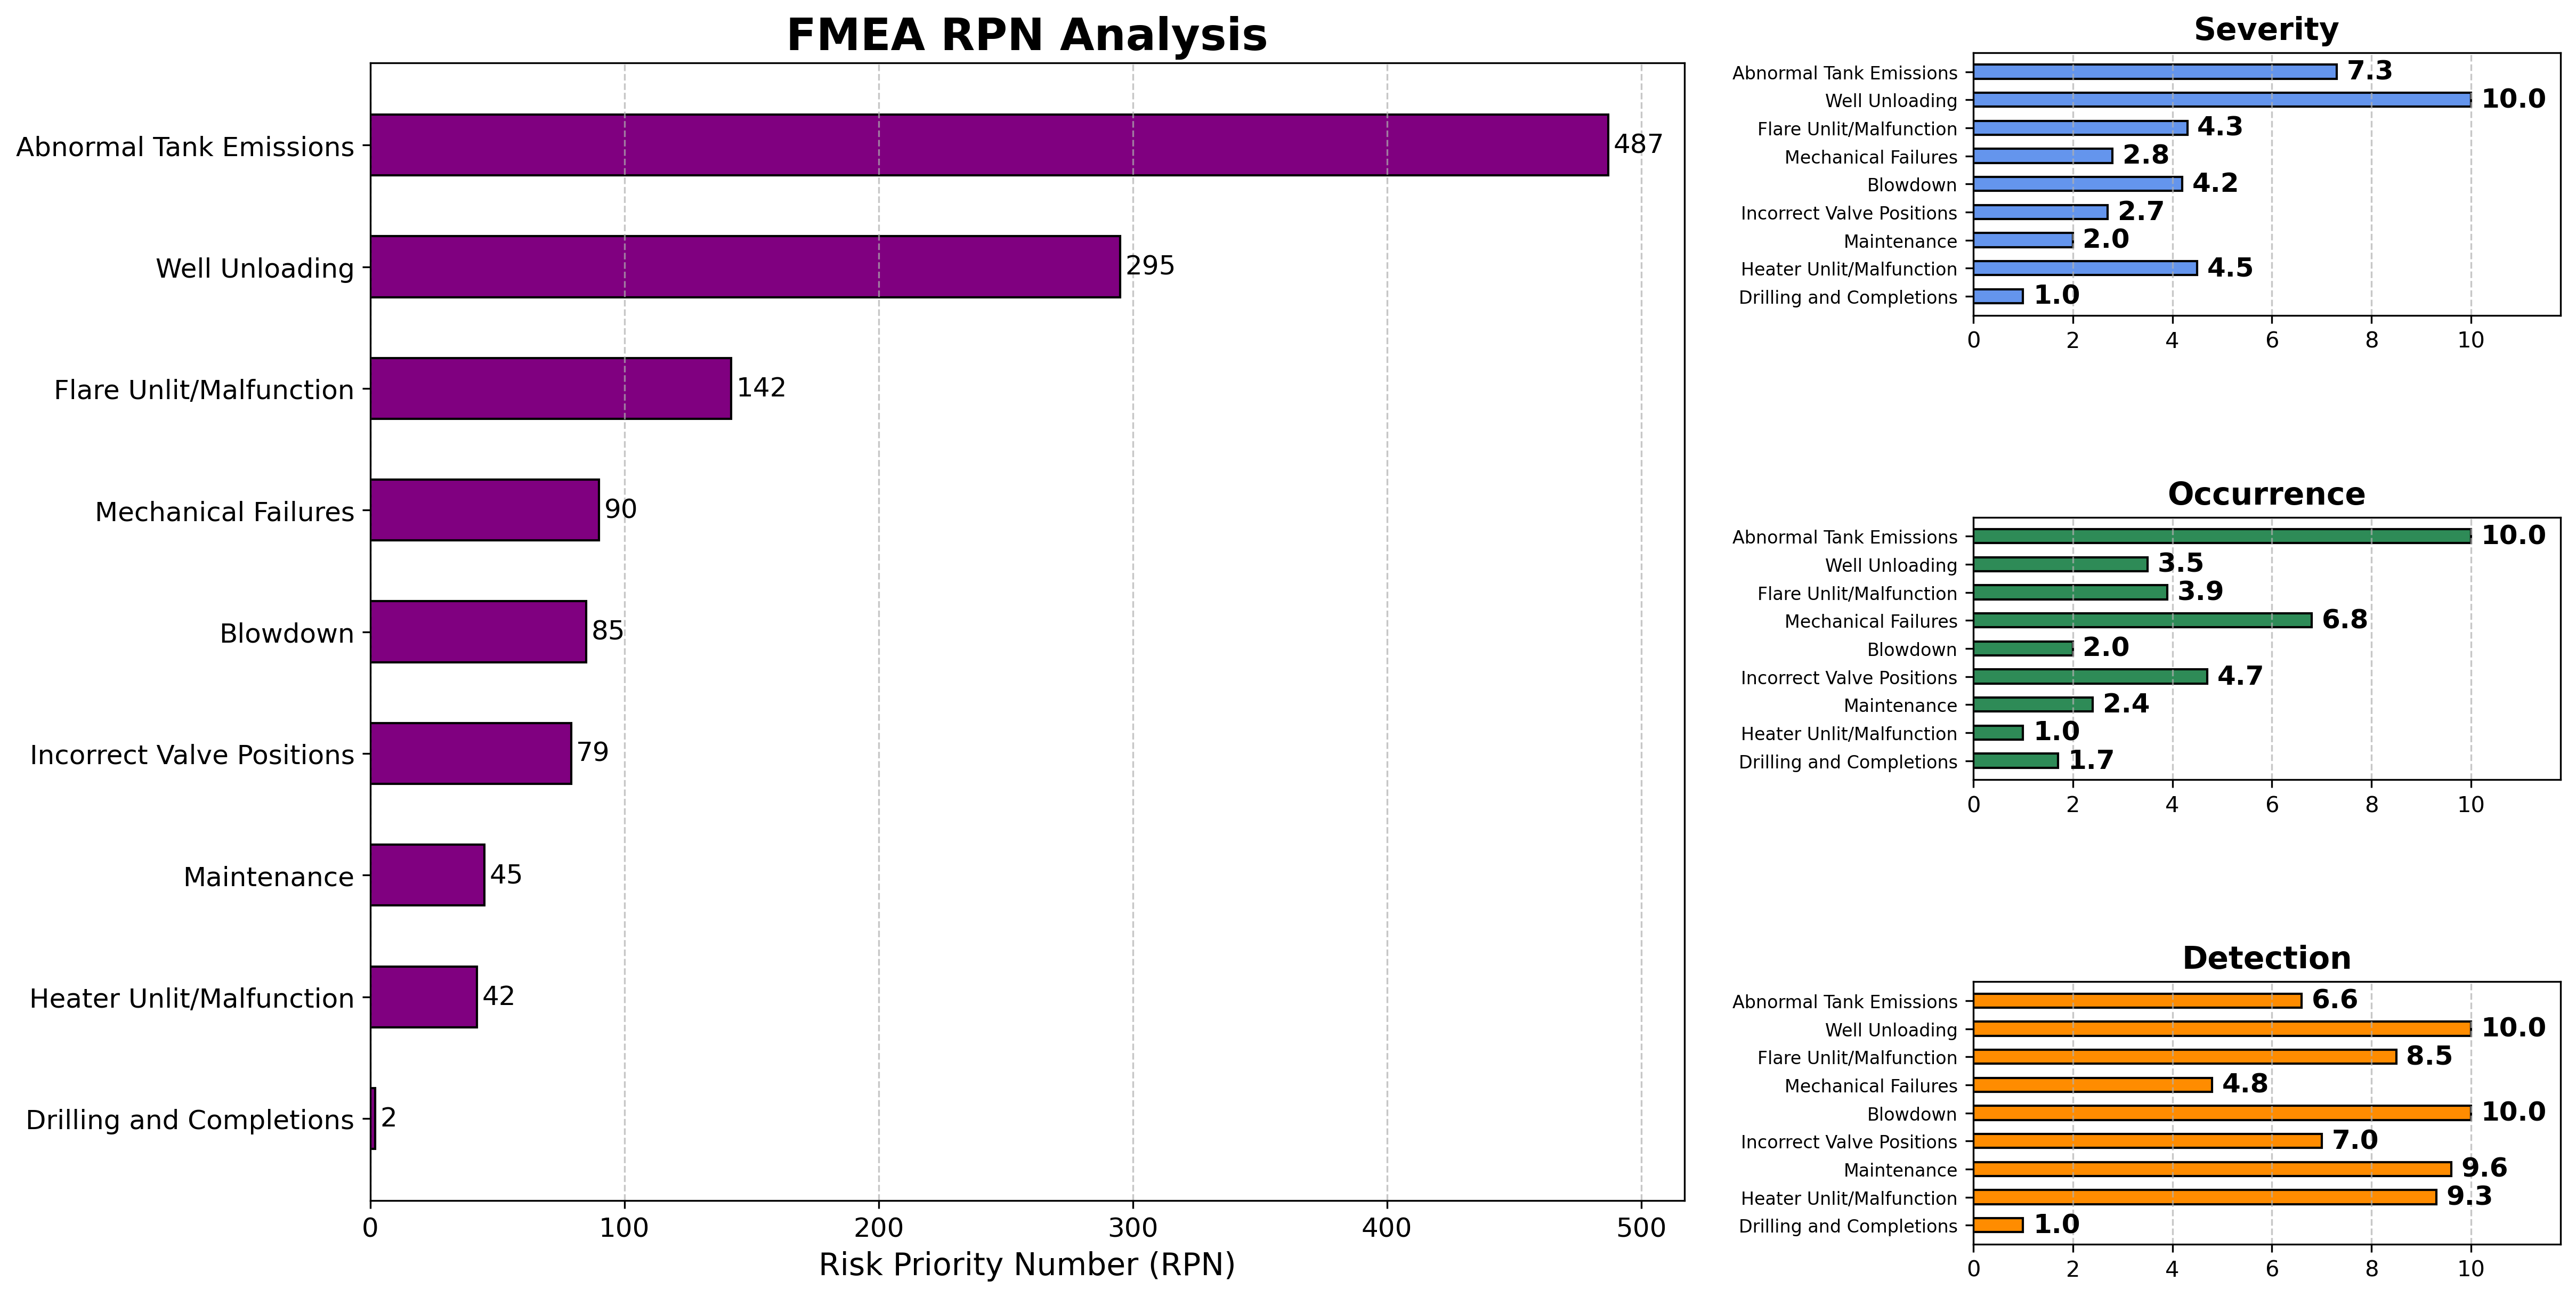

In [96]:
                 #6 - Mauscript Figure 4- FMEA Analysis
import matplotlib.gridspec as gridspec

fmea_data = {
    'Class': ['Well Unloading','Incorrect Valve Positions', 'Abnormal Tank Emissions', 'Flare Unlit/Malfunction','Mechanical Failures',
        'Maintenance','Blowdown','Heater Unlit/Malfunction','Drilling and Completions'],
    'Severity':   [10.0, 2.7, 7.3, 4.3, 2.8, 2, 4.2, 4.5, 1],
    'Occurrence': [3.5, 4.7, 10, 3.9, 6.8, 2.4, 2, 1, 1.7],
    'Detection':  [10, 7, 6.6, 8.5, 4.8, 9.6, 10, 9.3, 1],
    'RPN':        [295, 79, 487, 142, 90, 45, 85, 42, 2]  # S × O × D
}

fmea_df = pd.DataFrame(fmea_data)
# Sort by RPN descending for consistent ordering
dff_sorted = fmea_df.sort_values(by='RPN', ascending=False).reset_index(drop=True)

# Creating a Composite Figure - Left = FMEA RPN Chart, Right = Three Subplots for S,O and D
fig = plt.figure(figsize=(16, 8), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[1.5, 1], wspace=0.01) 

# LEFT SUBPLOT: FMEA RPN PLOT
ax_rpn = fig.add_subplot(gs[0, 0])
bar_height = 0.5
bars = ax_rpn.barh(dff_sorted['Class'], dff_sorted['RPN'], height=bar_height, color='purple', edgecolor='black', hatch='')
for i, rpn_value in enumerate(dff_sorted['RPN']): # Annotate each bar with RPN value to the right
    ax_rpn.text(rpn_value + 2, i, f"{int(rpn_value)}", va='center', fontsize=12)

ax_rpn.invert_yaxis()  # Highest RPN at top
max_rpn = dff_sorted['RPN'].max()
ax_rpn.set_xlim(0, max_rpn + 30)  # Space for annotations
ax_rpn.set_xlabel("Risk Priority Number (RPN)", fontsize=14)
ax_rpn.set_ylabel("", fontsize=16)
ax_rpn.set_title("FMEA RPN Analysis", fontsize=20, fontweight='bold')
ax_rpn.tick_params(axis='x', labelsize=12)
ax_rpn.tick_params(axis='y', labelsize=12)
ax_rpn.grid(axis='x', linestyle='--', alpha=0.7)

# RIGHT COLUMN: SUBGRIDSPEC FOR 3 SUBPLOTS 
gs_right = gs[0, 1].subgridspec(nrows=3, ncols=1, hspace=0.3)
metrics = ['Severity', 'Occurrence', 'Detection']
colors = ['cornflowerblue', 'seagreen', 'darkorange']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax = fig.add_subplot(gs_right[i, 0])
    # Horizontal bar for this metric
    ax.barh(dff_sorted['Class'], dff_sorted[metric], height=bar_height, color=color, edgecolor='black')
    # Annotate each bar with the metric value
    for idx, val in enumerate(dff_sorted[metric]):
        ax.text(val + 0.2, idx, f"{val}", va='center', fontsize=12, fontweight='bold')
    
    ax.invert_yaxis()
    ax.set_xlim(0, 11.8)
    #ax.set_xlim(0, max(dff_sorted[metric]) + 1)  # small buffer
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel(" ", fontsize=12)  # Y-label for each subplot
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

#plt.savefig("FMEA_RPN_and_Metrics_Composite.png", dpi=300, bbox_inches='tight')
plt.show()

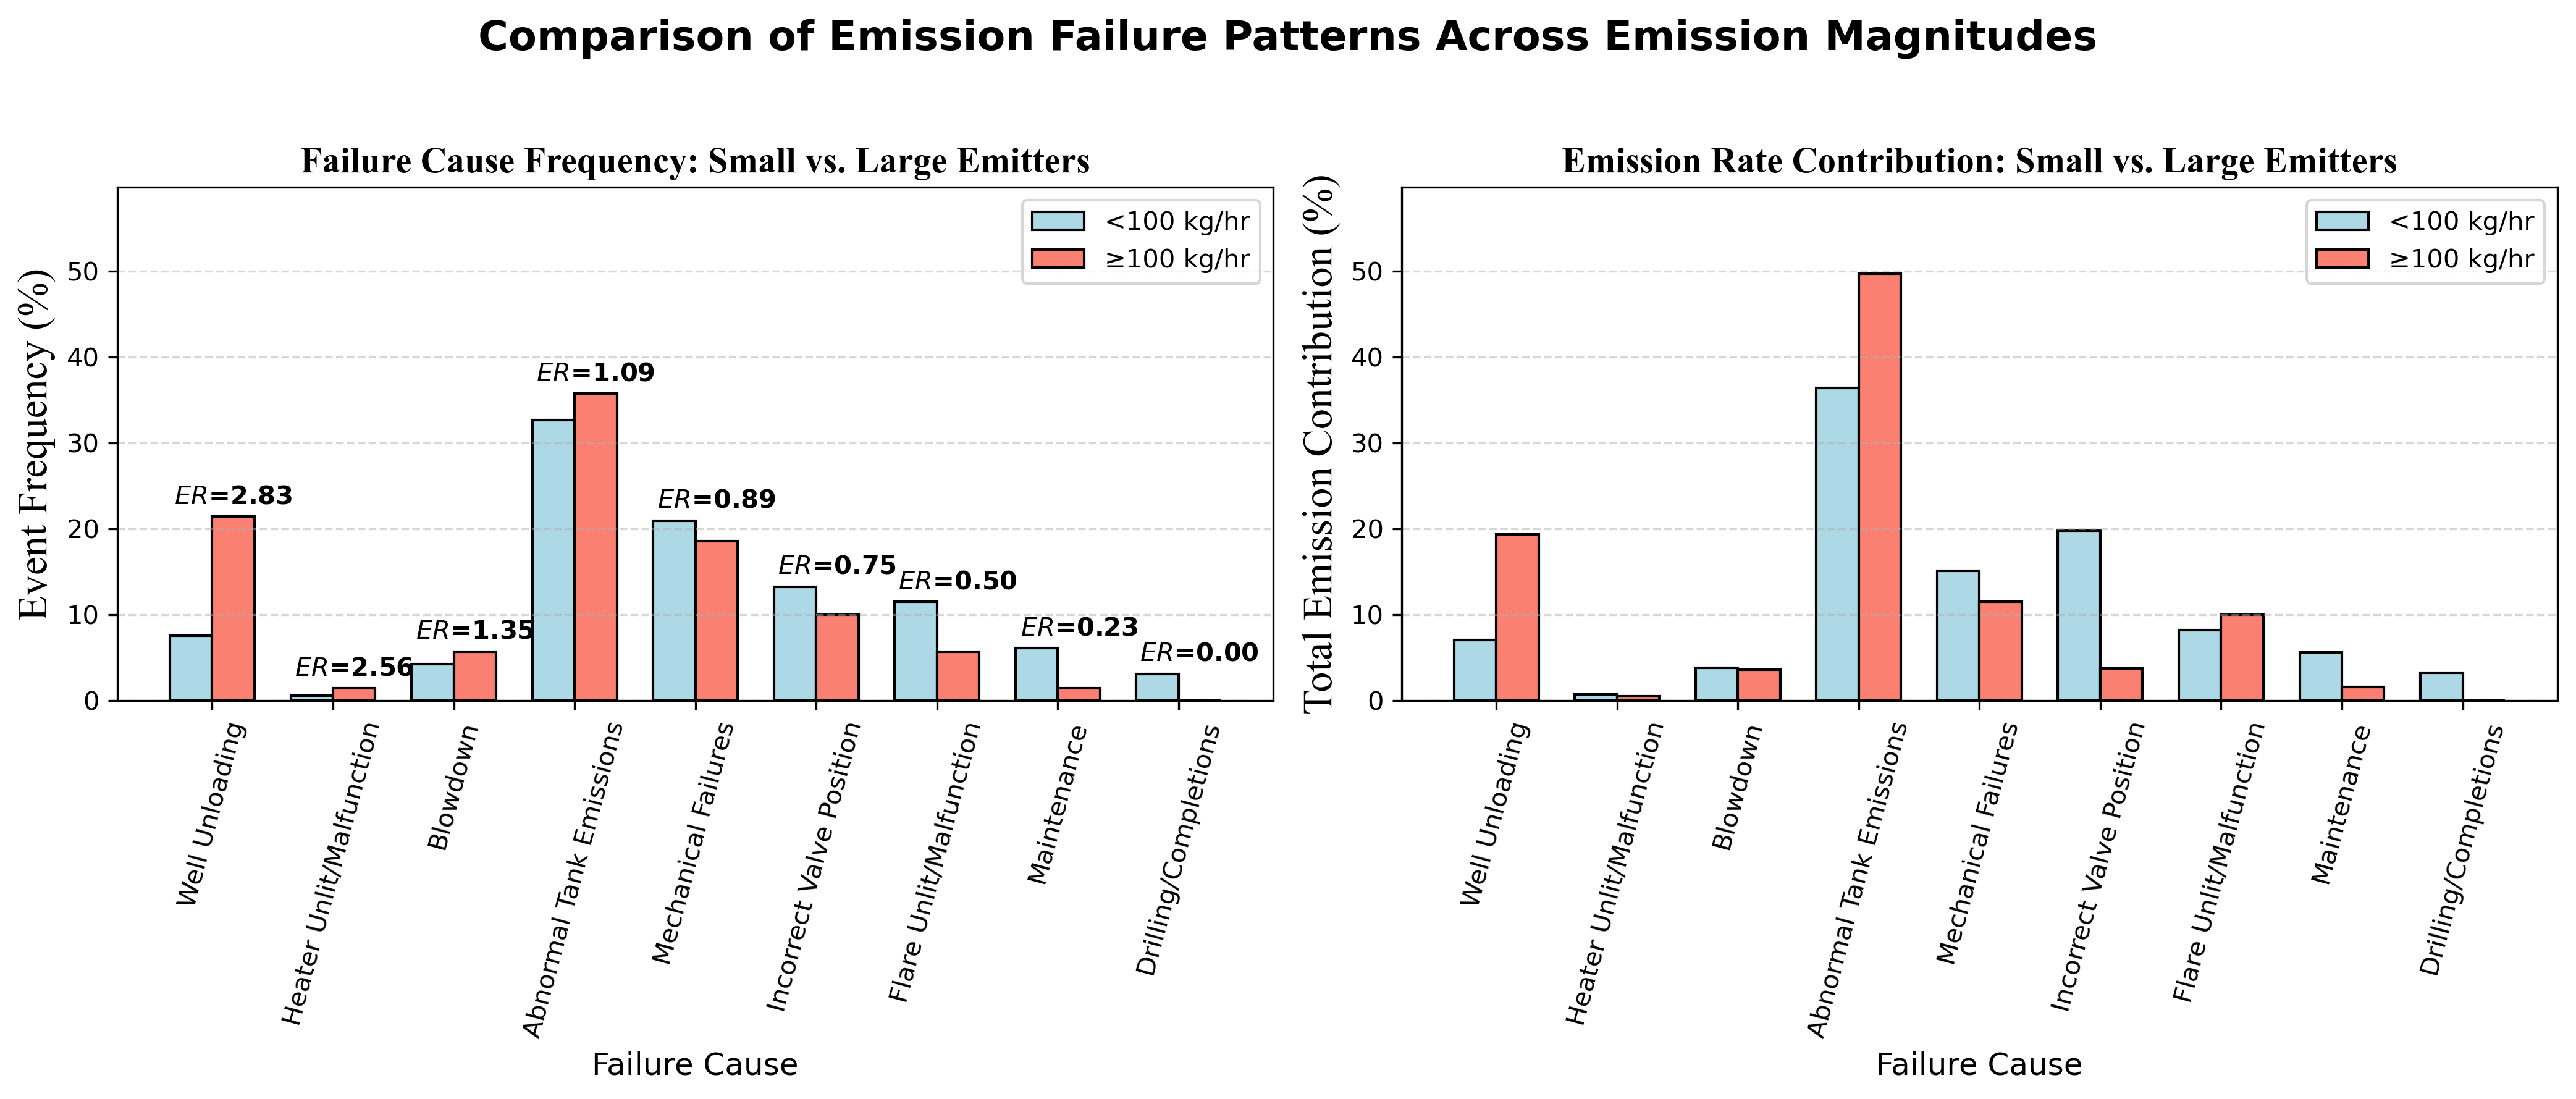

In [108]:

       #7.1  Defining Super-emiiter for ER analysis

emission_type_exclusion = ["Unknown 3rd party/ Unidentified", "Normal Operations"]
dfa = df[~df['Emission Type'].isin(emission_type_exclusion)]
equipment_exclusion = ["Compressor Station", "VRU",]
dfb = dfa[~dfa['Equipment Type'].isin(equipment_exclusion)]

general_emitters_df = dfb[dfb['Avg Emission Rate (kg/h)'] < 100]
super_emitters_df = dfb[dfb['Avg Emission Rate (kg/h)'] >= 100]


#8. Manuscript Plot 2 - Large vs Small Emitters

# Frequency (%)
freq_general = general_emitters_df['Emission Type'].value_counts(normalize=True) * 100
freq_super = super_emitters_df['Emission Type'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({'<100 kg/hr': freq_general, '≥100 kg/hr': freq_super}).fillna(0)

# Escalation Ratio (ER)
freq_df['ER'] = freq_df['≥100 kg/hr'] / freq_df['<100 kg/hr']
freq_df.replace([np.inf, -np.inf], np.nan, inplace=True)
freq_df.dropna(inplace=True)
freq_df.sort_values(by='ER', ascending=False, inplace=True)

# Emission rate contribution (%)
rate_general = general_emitters_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum()
rate_super = super_emitters_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum()
total_general = rate_general.sum()
total_super = rate_super.sum()

rate_df = pd.DataFrame({'<100 kg/hr': (rate_general / total_general * 100),'≥100 kg/hr': (rate_super / total_super * 100)}).fillna(0)

# Reorder rate_df to match freq_df
rate_df = rate_df.loc[freq_df.index]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
bar_width = 0.35
x = np.arange(len(freq_df))

# Left Plot: Frequency 
bars1 = axes[0].bar(x - bar_width/2, freq_df['<100 kg/hr'], width=bar_width, color='lightblue', edgecolor='black', label='<100 kg/hr')
bars2 = axes[0].bar(x + bar_width/2, freq_df['≥100 kg/hr'], width=bar_width, color='salmon', edgecolor='black', label='≥100 kg/hr')

axes[0].set_title("Failure Cause Frequency: Small vs. Large Emitters", fontsize=14, fontweight='bold', fontname="Times New Roman")
axes[0].set_ylabel("Event Frequency (%)", fontsize=16, fontname="Times New Roman")
axes[0].set_xticks(x)
axes[0].set_xticklabels(freq_df.index, rotation=75)
axes[0].legend()

# ER Labels above red bars
for i, val in enumerate(freq_df['ER']):
     y_pos = max(freq_df.iloc[i][['<100 kg/hr', '≥100 kg/hr']]) + 1.5
     axes[0].text(x[i] + bar_width/2, y_pos, f"$ER$={val:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')

# Right Plot: Emission Contribution
bars3 = axes[1].bar(x - bar_width/2, rate_df['<100 kg/hr'], width=bar_width, color='lightblue', edgecolor='black', label='<100 kg/hr')
bars4 = axes[1].bar(x + bar_width/2, rate_df['≥100 kg/hr'], width=bar_width, color='salmon', edgecolor='black', label='≥100 kg/hr')

axes[1].set_title("Emission Rate Contribution: Small vs. Large Emitters", fontsize=14, fontweight='bold', fontname="Times New Roman")
axes[1].set_ylabel("Total Emission Contribution (%)", fontsize=16, fontname="Times New Roman")
axes[1].set_xticks(x)
axes[1].set_xticklabels(rate_df.index, rotation=75)
axes[1].legend()

# Shared Plot formatting
for ax in axes:
     ax.set_xlabel("Failure Cause", fontsize=12)
     ax.set_ylim(0, max(freq_df[['<100 kg/hr', '≥100 kg/hr']].max().max(), rate_df[['<100 kg/hr', '≥100 kg/hr']].max().max()) + 10)
     ax.set_facecolor("white")
     ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Comparison of Emission Failure Patterns Across Emission Magnitudes", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig("Emission_Failure_Comparison_SideBySide.png", dpi=300, bbox_inches='tight')
plt.show()

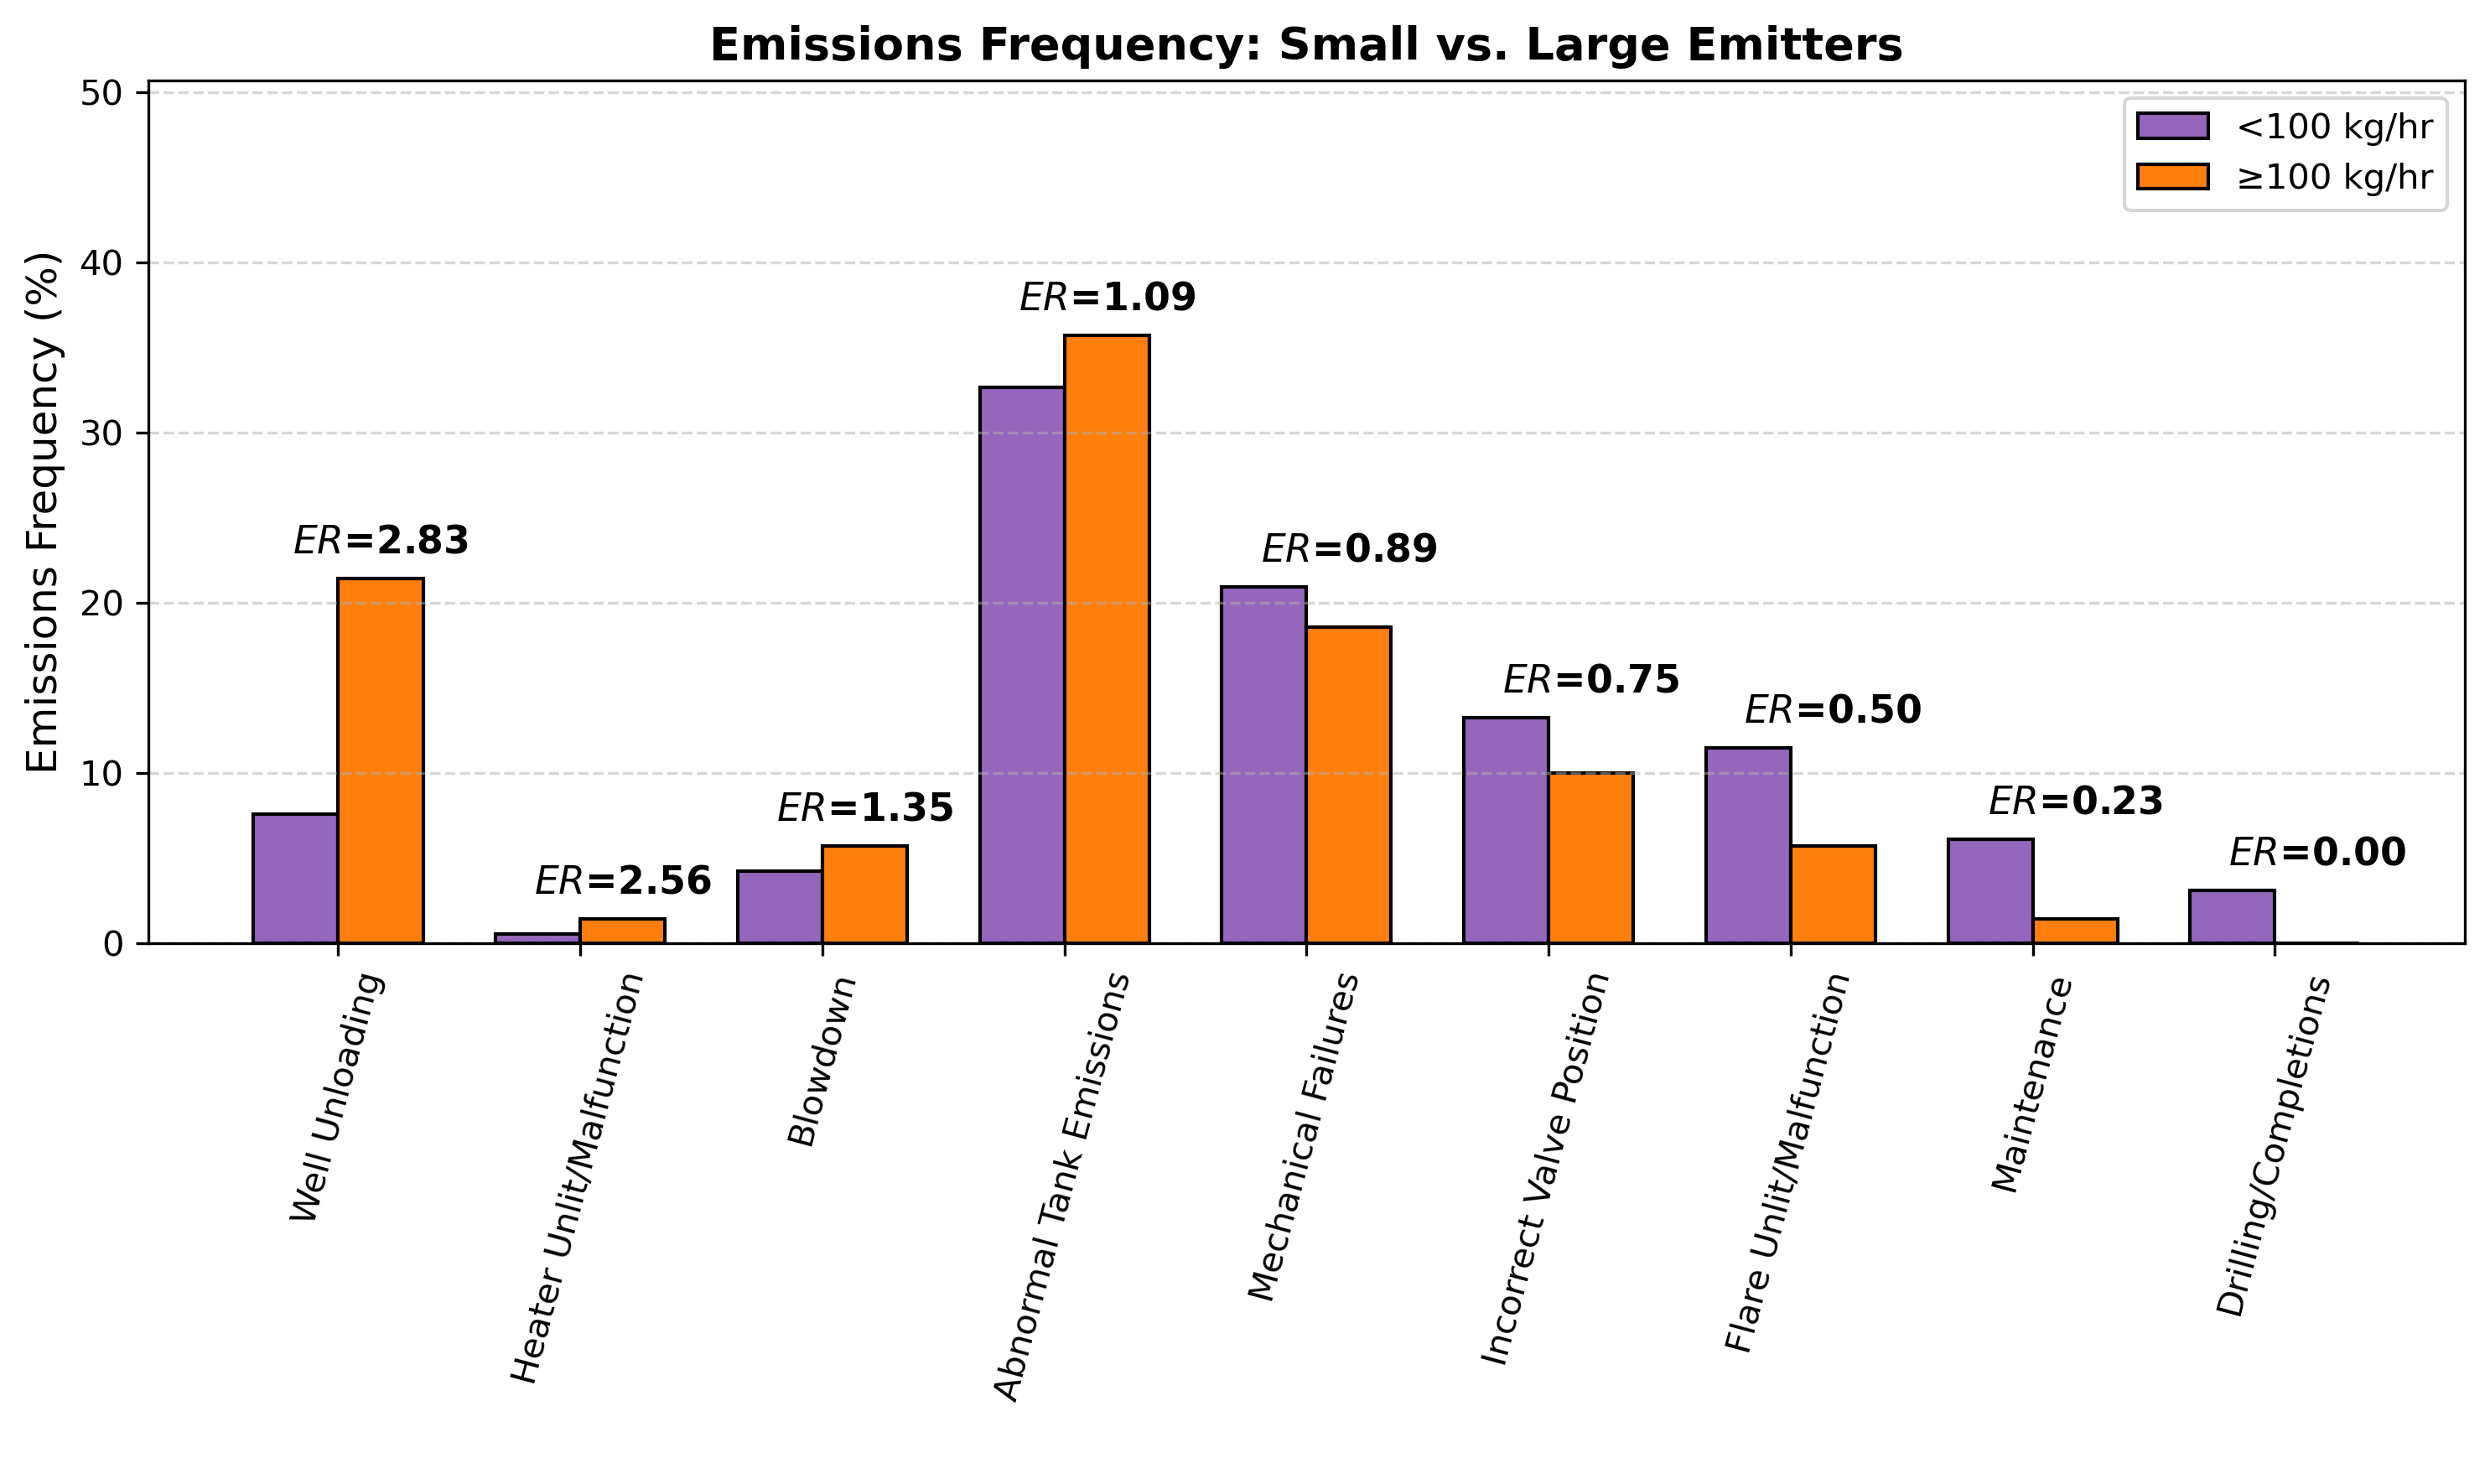

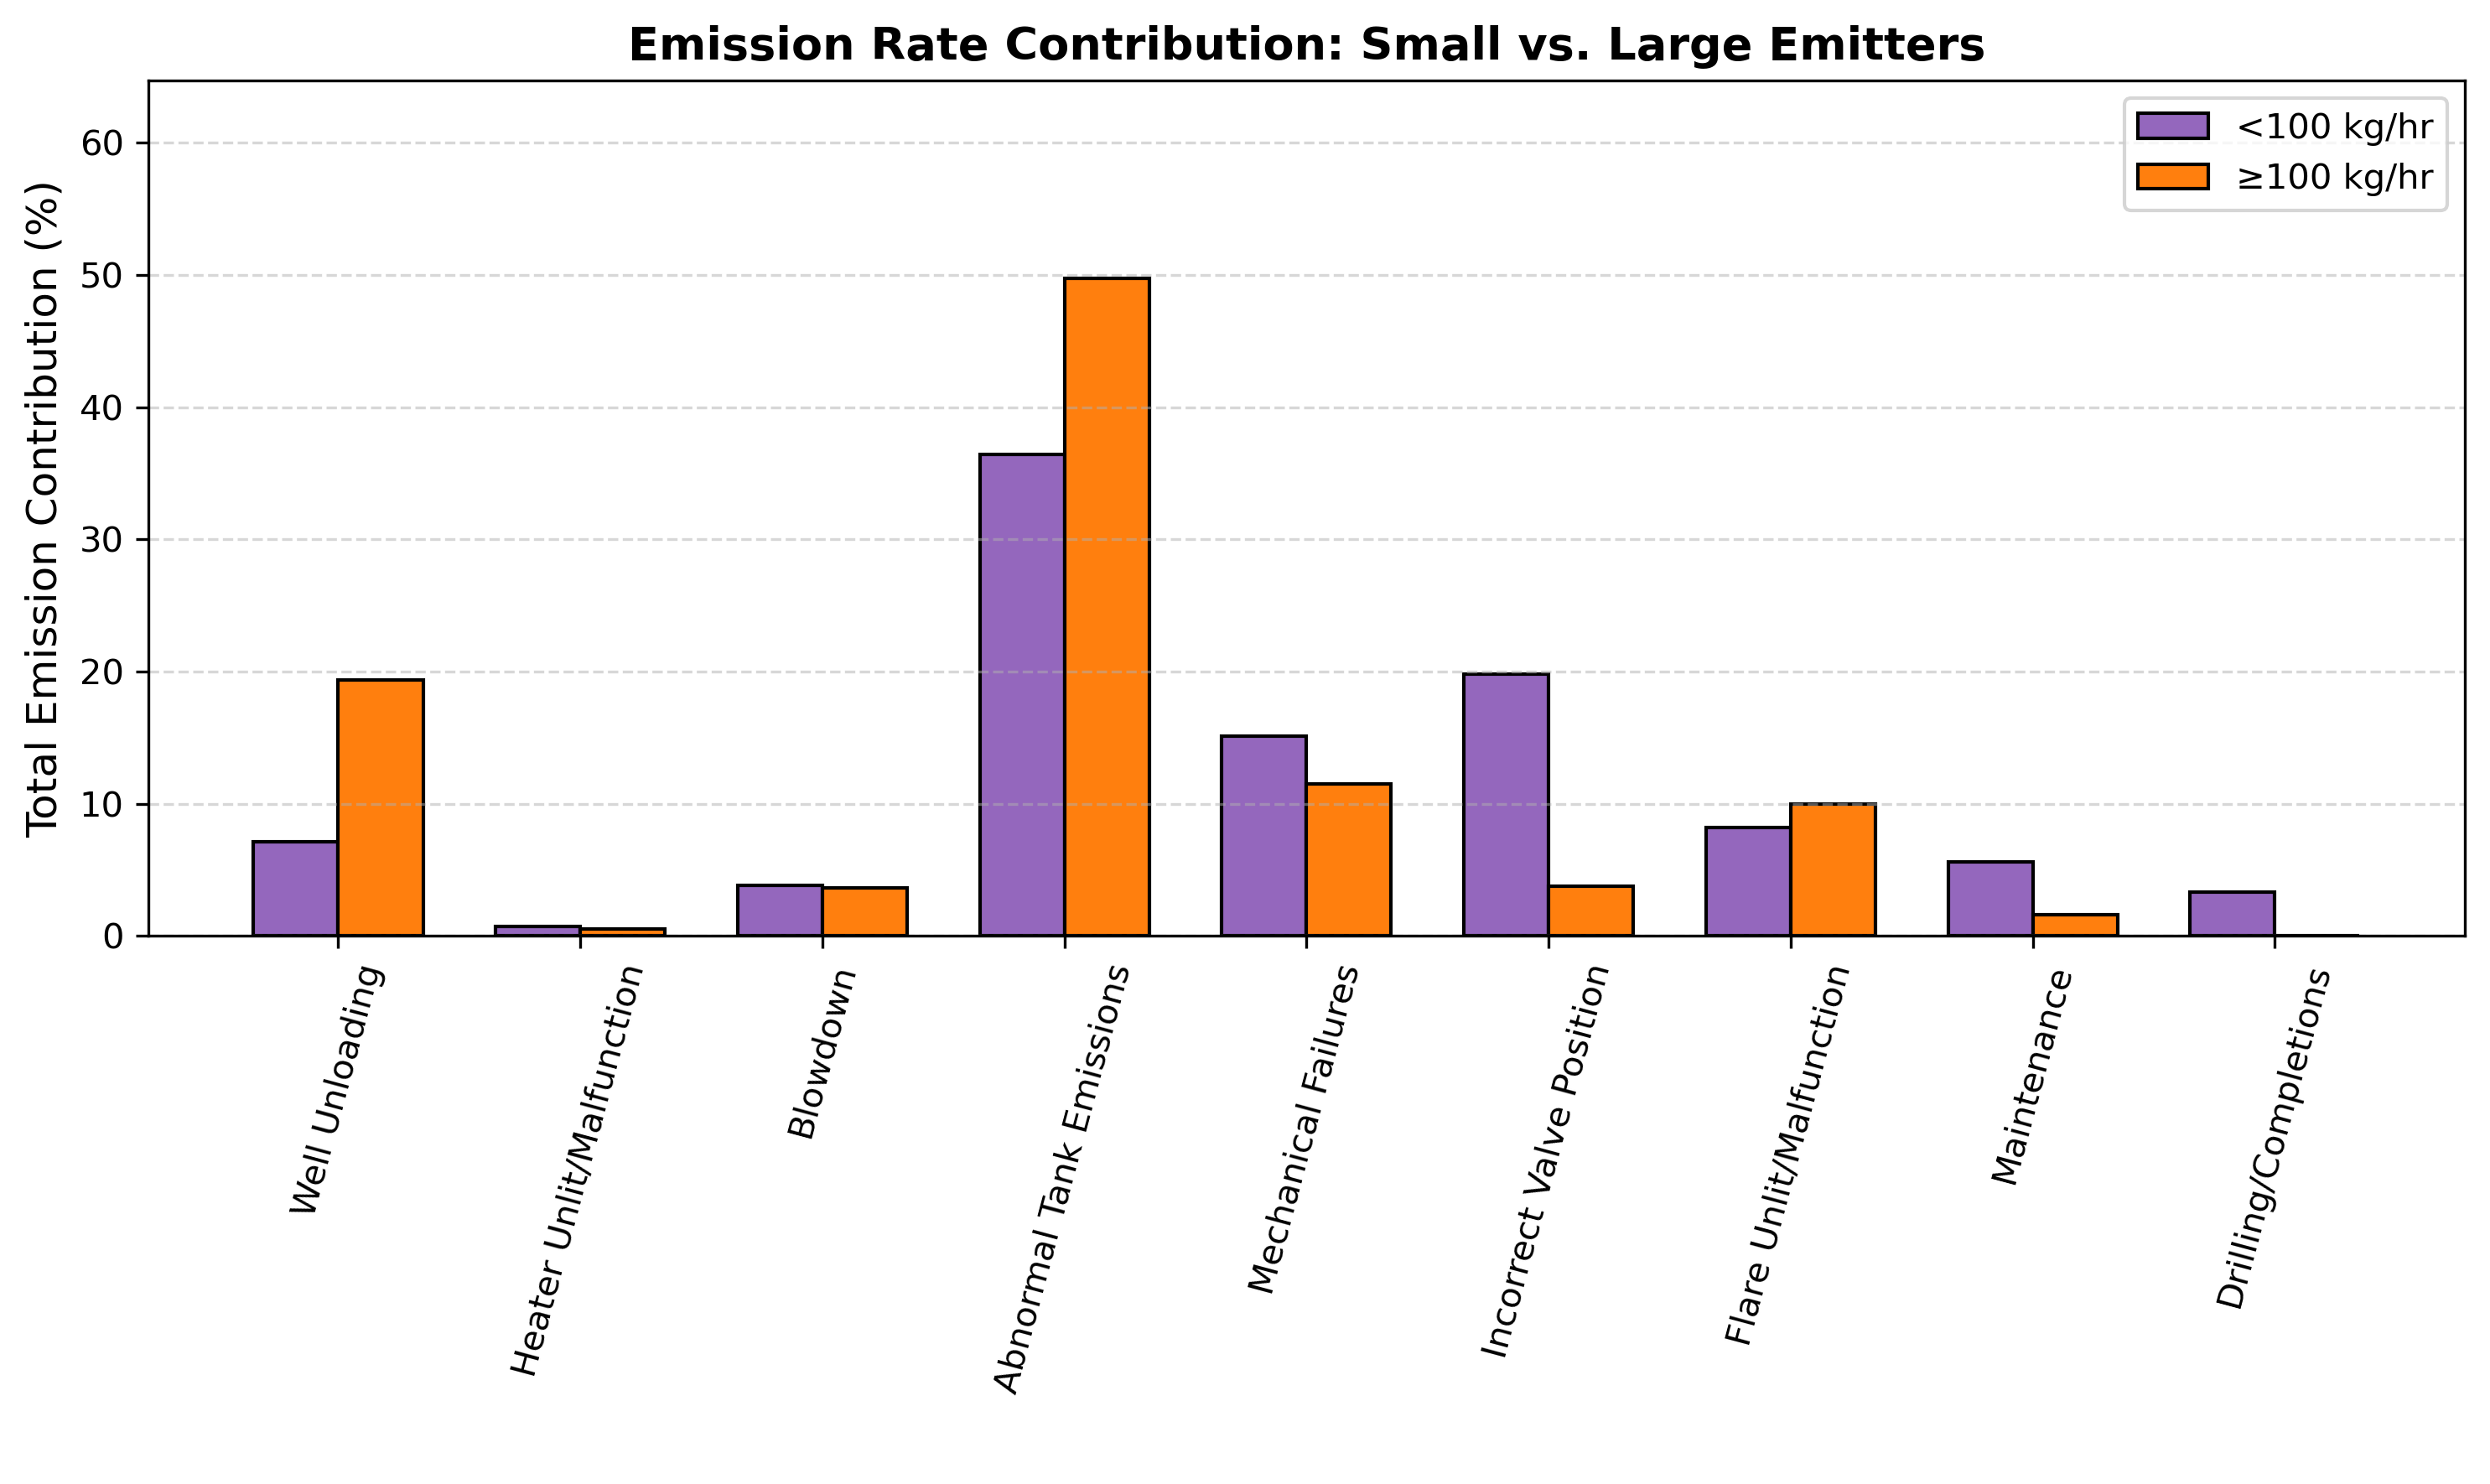

In [110]:
                          #9. Manuscript Plot 3 - Escalation Ratio
           
# Frequency DataFrame
freq_general = general_emitters_df['Emission Type'].value_counts(normalize=True) * 100
freq_super = super_emitters_df['Emission Type'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({'<100 kg/hr': freq_general, '≥100 kg/hr': freq_super}).fillna(0)

freq_df['ER'] = freq_df['≥100 kg/hr'] / freq_df['<100 kg/hr']
freq_df.replace([np.inf, -np.inf], np.nan, inplace=True)
freq_df.dropna(inplace=True)
freq_df.sort_values(by='ER', ascending=False, inplace=True)

# Emission Rate Contribution DataFrame
rate_general = general_emitters_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum()
rate_super = super_emitters_df.groupby('Emission Type')['Avg Emission Rate (kg/h)'].sum()
total_general = rate_general.sum()
total_super = rate_super.sum()

rate_df = pd.DataFrame({'<100 kg/hr': (rate_general / total_general * 100), '≥100 kg/hr': (rate_super / total_super * 100)}).fillna(0)
rate_df = rate_df.loc[freq_df.index]  # Ensure same order

# Plot 1: Frequency
fig1, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
x = np.arange(len(freq_df))
bar_width = 0.35

# Define your custom colors
color_small =  '#9467BD'  # Purple
color_large =  '#FF7F0E'  # Orange

# Frequency plot
ax1.bar(x - bar_width/2, freq_df['<100 kg/hr'], width=bar_width, color=color_small, edgecolor='black', label='<100 kg/hr')
ax1.bar(x + bar_width/2, freq_df['≥100 kg/hr'], width=bar_width, color=color_large, edgecolor='black', label='≥100 kg/hr')

# ER Annotations
for i, val in enumerate(freq_df['ER']):
    y_pos = max(freq_df.iloc[i][['<100 kg/hr', '≥100 kg/hr']]) + 1.5
    ax1.text(x[i] + bar_width/2, y_pos, f"$ER$={val:.2f}", ha='center', fontsize=11, fontweight='bold', color='black')

ax1.set_xticks(x)
ax1.set_xticklabels(freq_df.index, rotation=75)
ax1.set_ylabel("Emissions Frequency (%)", fontsize=12)
ax1.set_xlabel(" ", fontsize=12)
ax1.set_title("Emissions Frequency: Small vs. Large Emitters", fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_facecolor("white")
ax1.set_ylim(0, freq_df[['<100 kg/hr', '≥100 kg/hr']].max().max() + 15)

plt.tight_layout()
plt.savefig("Failure_Cause_Frequency_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Emission Rate Contribution
fig2, ax2 = plt.subplots(figsize=(10, 6), dpi=300)

# Emission Contribution plot
ax2.bar(x - bar_width/2, rate_df['<100 kg/hr'], width=bar_width, color=color_small, edgecolor='black', label='<100 kg/hr')
ax2.bar(x + bar_width/2, rate_df['≥100 kg/hr'], width=bar_width, color=color_large, edgecolor='black', label='≥100 kg/hr')

ax2.set_xticks(x)
ax2.set_xticklabels(rate_df.index, rotation=75)
ax2.set_ylabel("Total Emission Contribution (%)", fontsize=12)
ax2.set_xlabel(" ", fontsize=14)
ax2.set_title("Emission Rate Contribution: Small vs. Large Emitters", fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_facecolor("white")
ax2.set_ylim(0, rate_df[['<100 kg/hr', '≥100 kg/hr']].max().max() + 15)

plt.tight_layout()
#plt.savefig("bbFailure_Cause_Emission_Contribution_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()
